In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import warnings
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

1. data preparation

In [2]:
clf = XGBClassifier(n_estimators = 535, max_depth = 1, learning_rate = 0.0403205032029171, min_child_weight = 4,
                            gamma = 0.20811750149748293, subsample = 0.5649957071497334, random_state = 123)
sig_feas = ['S_NUM_S', 'AGE', 'S_E_T', 'S_BTH_T', 'S_T', 'F', 'I', 'S_ET_RA', 'SEX', 'S_ET', 'S_ST']

In [3]:
#-----------------------------nameing the feature sets-----------------------
loco_lob = ['F', 'T', 'P', 'O', 'I', 'CC', 'BG', 'TH']
loco_lr = ['F', 'T', 'P', 'O', 'I', 'CC', 'BG', 'TH', 
         'M', 'S', 'H', 'GC']
loco = ['L_F', 'L_T', 'L_P', 'L_O', 'L_I', 'L_CC', 'L_BG', 'L_TH', 
      'L_M', 'L_S', 'L_H', 'L_GC',
      'R_F', 'R_T', 'R_P', 'R_O', 'R_I', 'R_CC', 'R_BG', 'R_TH', 
      'R_M', 'R_S', 'R_H', 'R_GC'] 
loco_a = ['L_F', 'L_T', 'L_P', 'L_O', 'L_I', 'L_CC', 'L_BG', 'L_TH',
          'L_M', 'L_S', 'L_H', 'L_GC',
        'R_F', 'R_T', 'R_P', 'R_O', 'R_I', 'R_CC', 'R_BG', 'R_TH',
          'R_M', 'R_S', 'R_H', 'R_GC', 
        'F', 'T', 'P', 'O', 'I', 'CC', 'BG', 'TH',
          'M', 'S', 'H', 'GC']
#sym
symp_p = ['S_I_P', 'S_M_P', 'S_S_P', 'S_Ap_P', 'S_Cog_P', 'S_BTH_P', 'S_E_P',
          'S_Con_P', 'S_Ab_P', 'S_V_P', 'S_Au_P']
symp_s = ['S_I', 'S_M', 'S_S', 'S_Ap', 'S_Cog', 'S_BTH', 'S_E',
          'S_Con', 'S_Ab', 'S_V', 'S_Au']
symp_p_only = []
[symp_p_only.append(sy + '_P_ONLY') for sy in symp_p]
symp_s_only = []
[symp_s_only.append(sy + '_S_ONLY') for sy in symp_s]
##sym_t
symp_t = ['S_T', 'S_ST', 'S_DT', 'S_ET', 'S_ST_RA', 'S_DT_RA', 'S_ET_RA']
symp_st = ['S_I_DIS_T', 'S_I_FOLL_T', 'S_M_T', 'S_S_T', 'S_AP_T', 'S_COG_T', 'S_BTH_T', 'S_E_T',
           'S_CON_T', 'S_ABD_T', 'S_V_T', 'S_AUD_T']
symp_st_ra = []
[symp_st_ra.append((sy_st + '_RA')) for sy_st in symp_st]
symp_st_a = symp_st + symp_st_ra

In [4]:
# --------------------------------------------the main set-----------------------------
data_1 = pd.read_excel('/media/lee_ns/project/project/N10/main_11_23.xlsx')

#  feature engineering
data_1['F'] = ((data_1['L_F'] == 1)|(data_1['R_F'] == 1)) + 0
data_1['T'] = ((data_1['L_T'] == 1)|(data_1['R_T'] == 1)) + 0
data_1['P'] = ((data_1['L_P'] == 1)|(data_1['R_P'] == 1)) + 0
data_1['O'] = ((data_1['L_O'] == 1)|(data_1['R_O'] == 1)) + 0
data_1['I'] = ((data_1['L_I'] == 1)|(data_1['R_I'] == 1)) + 0
data_1['CC'] = ((data_1['L_CC'] == 1)|(data_1['R_CC'] == 1)) + 0
data_1['BG'] = ((data_1['L_BG'] == 1)|(data_1['R_BG'] == 1)) + 0
data_1['TH'] = ((data_1['L_TH'] == 1)|(data_1['R_TH'] == 1)) + 0
data_1['M'] = ((data_1['L_M'] == 1)|(data_1['R_M'] == 1)) + 0
data_1['S'] = ((data_1['L_S'] == 1)|(data_1['R_S'] == 1)) + 0
data_1['H'] = ((data_1['L_H'] == 1)|(data_1['R_H'] == 1)) + 0
data_1['GC'] = ((data_1['L_GC'] == 1)|(data_1['R_GC'] == 1)) + 0
data_1['BILATERAL'] = ((data_1['L'] + data_1['R']) == 2) + 0
data_1['NUM_L'] = 0
data_1['LOCALIZED'] = 0
data_1['S_NUM_P'] = 0
data_1['S_NUM_S'] = 0
data_1['S_P_ONLY'] = 0
data_1['S_S_ONLY'] = 0
data_1['S_I'] = data_1['S_I_P']
data_1['S_ST_RA'] = 0
data_1['S_DT_RA'] = 0
data_1['S_ET_RA'] = 0
for sy in symp_st:
    data_1[sy + '_RA'] = 0
for i in range(len(data_1)):
    # num_lobs       
    for lo in loco_lob:
        if data_1[lo][i]>0:
            data_1.loc[i, 'NUM_L'] += 1
    # localized (num_l = 1)
    if data_1.loc[i, 'NUM_L'] == 1:
        data_1.loc[i, 'LOCALIZED'] = 1
    # sy_t_ratio  
    for sy in symp_st:
        data_1.loc[i, sy+'_RA'] = data_1[sy][i] / data_1['S_T'][i]
    #ST_RA
    data_1.loc[i, 'S_ST_RA'] = data_1['S_ST'][i] / data_1['S_T'][i]
    data_1.loc[i, 'S_DT_RA'] = data_1['S_DT'][i] / data_1['S_T'][i]
    data_1.loc[i, 'S_ET_RA'] = data_1['S_ET'][i] / data_1['S_T'][i]
    # sy_num
    for sy_p in symp_p:
        data_1.loc[i, 'S_NUM_P'] += data_1[sy_p][i]                
    for sy_s in symp_s:
        data_1.loc[i, 'S_NUM_S'] += data_1[sy_s][i]
    # sym_only******
    data_1.loc[i, 'S_P_ONLY'] = 1 - (data_1['S_NUM_P'][i] > 1)           
    for sy in symp_p:
        data_1.loc[i, sy + '_P_ONLY'] = data_1[sy][i] * data_1['S_P_ONLY'][i]
          
    data_1.loc[i, 'S_S_ONLY'] = 1 - (data_1['S_NUM_S'][i] > 1)              
    for sy in symp_s:
        data_1.loc[i, sy + '_S_ONLY'] = data_1[sy][i] * data_1['S_S_ONLY'][i]  
data_1 = data_1.drop('S_I',axis = 1)
data_1

ID  SEX  AGE  L  R  L_F  L_T  L_P  L_O  L_I  ...  S_M_S_ONLY  \
0      1    1   42  1  1    0    0    0    0    0  ...         0.0   
1      2    1   40  0  1    0    0    0    0    0  ...         0.0   
2      3    1   47  0  1    0    0    0    0    0  ...         0.0   
3      4    1   71  1  0    0    1    0    0    0  ...         0.0   
4      5    1   46  0  1    0    0    0    0    0  ...         0.0   
..   ...  ...  ... .. ..  ...  ...  ...  ...  ...  ...         ...   
985  986    1   49  1  0    0    1    1    1    0  ...         0.0   
986  987    1   45  0  1    0    0    0    0    0  ...         0.0   
987  988    2   34  1  0    1    1    0    0    1  ...         0.0   
988  989    2   45  1  0    1    1    0    0    1  ...         0.0   
989  990    2   35  0  1    0    0    0    0    0  ...         1.0   

     S_S_S_ONLY  S_Ap_S_ONLY  S_Cog_S_ONLY  S_BTH_S_ONLY  S_E_S_ONLY  \
0           0.0          0.0           0.0           0.0         0.0   
1           0.0          0.0           0.0           0.0         1.0   
2           0.0          0.0           0.0           0.0         0.0   
3           0.0          0.0           0.0           0.0         0.0   
4           0.0          0.0           0.0           0.0         0.0   
..          ...          ...           ...           ...         ...   
985         0.0          0.0           0.0           0.0         0.0   
986         0.0          0.0           0.0           0.0         1.0   
987         0.0          0.0           0.0           0.0         1.0   
988         0.0          0.0           0.0           0.0         1.0   
989         0.0          0.0           0.0           0.0         0.0   

     S_Con_S_ONLY  S_Ab_S_ONLY  S_V_S_ONLY  S_Au_S_ONLY  
0             0.0          0.0         0.0          0.0  
1             0.0          0.0         0.0          0.0  
2             0.0          0.0         0.0          0.0  
3             0.0          0.0         0.0          0.0  
4             0.0          0.0         0.0          0.0  
..            ...          ...         ...          ...  
985           0.0          0.0         0.0          0.0  
986           0.0          0.0         0.0          0.0  
987           0.0          0.0         0.0          0.0  
988           0.0          0.0         0.0          0.0  
989           0.0          0.0         0.0          0.0  

[990 rows x 131 columns]

In [5]:
x_1 = deepcopy(data_1)
y_1 = x_1['GRADE']
x_1 = x_1[sig_feas]
y_1 = np.squeeze(np.array(y_1))
y_1[y_1 < 4] = 0
y_1[y_1 == 4] = 1

In [6]:
# --------------------------------------------the prospective set-----------------------------
data_2 = pd.read_excel('/media/lee_ns/project/project/N10/test_ims_11_23.xlsx')

#  feature engineering
data_2['F'] = ((data_2['L_F'] == 1)|(data_2['R_F'] == 1)) + 0
data_2['T'] = ((data_2['L_T'] == 1)|(data_2['R_T'] == 1)) + 0
data_2['P'] = ((data_2['L_P'] == 1)|(data_2['R_P'] == 1)) + 0
data_2['O'] = ((data_2['L_O'] == 1)|(data_2['R_O'] == 1)) + 0
data_2['I'] = ((data_2['L_I'] == 1)|(data_2['R_I'] == 1)) + 0
data_2['CC'] = ((data_2['L_CC'] == 1)|(data_2['R_CC'] == 1)) + 0
data_2['BG'] = ((data_2['L_BG'] == 1)|(data_2['R_BG'] == 1)) + 0
data_2['TH'] = ((data_2['L_TH'] == 1)|(data_2['R_TH'] == 1)) + 0
data_2['M'] = ((data_2['L_M'] == 1)|(data_2['R_M'] == 1)) + 0
data_2['S'] = ((data_2['L_S'] == 1)|(data_2['R_S'] == 1)) + 0
data_2['H'] = ((data_2['L_H'] == 1)|(data_2['R_H'] == 1)) + 0
data_2['GC'] = ((data_2['L_GC'] == 1)|(data_2['R_GC'] == 1)) + 0
data_2['BILATERAL'] = ((data_2['L'] + data_2['R']) == 2) + 0
data_2['NUM_L'] = 0
data_2['LOCALIZED'] = 0
data_2['S_NUM_P'] = 0
data_2['S_NUM_S'] = 0
data_2['S_P_ONLY'] = 0
data_2['S_S_ONLY'] = 0
data_2['S_I'] = data_2['S_I_P']
data_2['S_ST_RA'] = 0
data_2['S_DT_RA'] = 0
data_2['S_ET_RA'] = 0
for sy in symp_st:
    data_2[sy + '_RA'] = 0
for i in range(len(data_2)):
    # num_lobs       
    for lo in loco_lob:
        if data_2[lo][i]>0:
            data_2.loc[i, 'NUM_L'] += 1
    # localized (num_l = 1)
    if data_2.loc[i, 'NUM_L'] == 1:
        data_2.loc[i, 'LOCALIZED'] = 1
    # sy_t_ratio  
    for sy in symp_st:
        data_2.loc[i, sy+'_RA'] = data_2[sy][i] / data_2['S_T'][i]
    #ST_RA
    data_2.loc[i, 'S_ST_RA'] = data_2['S_ST'][i] / data_2['S_T'][i]
    data_2.loc[i, 'S_DT_RA'] = data_2['S_DT'][i] / data_2['S_T'][i]
    data_2.loc[i, 'S_ET_RA'] = data_2['S_ET'][i] / data_2['S_T'][i]
    # sy_num
    for sy_p in symp_p:
        data_2.loc[i, 'S_NUM_P'] += data_2[sy_p][i]                
    for sy_s in symp_s:
        data_2.loc[i, 'S_NUM_S'] += data_2[sy_s][i]
    # sym_only******
    data_2.loc[i, 'S_P_ONLY'] = 1 - (data_2['S_NUM_P'][i] > 1)           
    for sy in symp_p:
        data_2.loc[i, sy + '_P_ONLY'] = data_2[sy][i] * data_2['S_P_ONLY'][i]
          
    data_2.loc[i, 'S_S_ONLY'] = 1 - (data_2['S_NUM_S'][i] > 1)              
    for sy in symp_s:
        data_2.loc[i, sy + '_S_ONLY'] = data_2[sy][i] * data_2['S_S_ONLY'][i]  
data_2 = data_2.drop('S_I',axis = 1)
data_2

ID  SEX  AGE  L  R  L_F  L_T  L_P  L_O  L_I  ...  S_M_S_ONLY  \
0      1    1   48  1  0    1    1    0    0    1  ...         0.0   
1      2    1   35  1  0    0    0    0    0    1  ...         0.0   
2      3    2   49  1  1    1    0    0    0    0  ...         0.0   
3      4    1   56  1  0    0    1    0    0    1  ...         0.0   
4      5    1   28  1  0    0    1    0    0    1  ...         0.0   
..   ...  ...  ... .. ..  ...  ...  ...  ...  ...  ...         ...   
166  167    1   32  0  1    0    0    0    0    0  ...         0.0   
167  168    2   45  1  0    1    0    0    0    0  ...         0.0   
168  169    2   31  1  0    1    0    0    0    1  ...         0.0   
169  170    1   49  1  0    1    0    0    0    0  ...         0.0   
170  171    1   37  0  1    0    0    0    0    0  ...         0.0   

     S_S_S_ONLY  S_Ap_S_ONLY  S_Cog_S_ONLY  S_BTH_S_ONLY  S_E_S_ONLY  \
0           0.0          0.0           0.0           0.0         0.0   
1           0.0          0.0           0.0           0.0         0.0   
2           0.0          0.0           0.0           0.0         0.0   
3           0.0          0.0           0.0           0.0         1.0   
4           0.0          0.0           0.0           0.0         0.0   
..          ...          ...           ...           ...         ...   
166         0.0          0.0           0.0           0.0         1.0   
167         0.0          0.0           0.0           0.0         0.0   
168         0.0          0.0           0.0           0.0         1.0   
169         0.0          0.0           0.0           0.0         0.0   
170         0.0          0.0           0.0           0.0         0.0   

     S_Con_S_ONLY  S_Ab_S_ONLY  S_V_S_ONLY  S_Au_S_ONLY  
0             0.0          0.0         0.0          0.0  
1             0.0          0.0         0.0          0.0  
2             0.0          0.0         0.0          0.0  
3             0.0          0.0         0.0          0.0  
4             0.0          0.0         0.0          0.0  
..            ...          ...         ...          ...  
166           0.0          0.0         0.0          0.0  
167           0.0          0.0         0.0          0.0  
168           0.0          0.0         0.0          0.0  
169           0.0          0.0         0.0          0.0  
170           0.0          0.0         0.0          0.0  

[171 rows x 131 columns]

In [7]:
x_2 = deepcopy(data_2)
y_2 = x_2['GRADE']
x_2 = x_2[sig_feas]
y_2 = np.squeeze(np.array(y_2))
y_2[y_2 < 4] = 0
y_2[y_2 == 4] = 1

In [8]:
# --------------------------------------------the external set--------------------------------
data_3 = pd.read_excel('/media/lee_ns/project/project/N10/test_sydyy_11_23.xlsx')

#  feature engineering
data_3['F'] = ((data_3['L_F'] == 1)|(data_3['R_F'] == 1)) + 0
data_3['T'] = ((data_3['L_T'] == 1)|(data_3['R_T'] == 1)) + 0
data_3['P'] = ((data_3['L_P'] == 1)|(data_3['R_P'] == 1)) + 0
data_3['O'] = ((data_3['L_O'] == 1)|(data_3['R_O'] == 1)) + 0
data_3['I'] = ((data_3['L_I'] == 1)|(data_3['R_I'] == 1)) + 0
data_3['CC'] = ((data_3['L_CC'] == 1)|(data_3['R_CC'] == 1)) + 0
data_3['BG'] = ((data_3['L_BG'] == 1)|(data_3['R_BG'] == 1)) + 0
data_3['TH'] = ((data_3['L_TH'] == 1)|(data_3['R_TH'] == 1)) + 0
data_3['M'] = ((data_3['L_M'] == 1)|(data_3['R_M'] == 1)) + 0
data_3['S'] = ((data_3['L_S'] == 1)|(data_3['R_S'] == 1)) + 0
data_3['H'] = ((data_3['L_H'] == 1)|(data_3['R_H'] == 1)) + 0
data_3['GC'] = ((data_3['L_GC'] == 1)|(data_3['R_GC'] == 1)) + 0
data_3['BILATERAL'] = ((data_3['L'] + data_3['R']) == 2) + 0
data_3['NUM_L'] = 0
data_3['LOCALIZED'] = 0
data_3['S_NUM_P'] = 0
data_3['S_NUM_S'] = 0
data_3['S_P_ONLY'] = 0
data_3['S_S_ONLY'] = 0
data_3['S_I'] = data_3['S_I_P']
data_3['S_ST_RA'] = 0
data_3['S_DT_RA'] = 0
data_3['S_ET_RA'] = 0
for sy in symp_st:
    data_3[sy + '_RA'] = 0
for i in range(len(data_3)):
    # num_lobs       
    for lo in loco_lob:
        if data_3[lo][i]>0:
            data_3.loc[i, 'NUM_L'] += 1
    # localized (num_l = 1)
    if data_3.loc[i, 'NUM_L'] == 1:
        data_3.loc[i, 'LOCALIZED'] = 1
    # sy_t_ratio  
    for sy in symp_st:
        data_3.loc[i, sy+'_RA'] = data_3[sy][i] / data_3['S_T'][i]
    #ST_RA
    data_3.loc[i, 'S_ST_RA'] = data_3['S_ST'][i] / data_3['S_T'][i]
    data_3.loc[i, 'S_DT_RA'] = data_3['S_DT'][i] / data_3['S_T'][i]
    data_3.loc[i, 'S_ET_RA'] = data_3['S_ET'][i] / data_3['S_T'][i]
    # sy_num
    for sy_p in symp_p:
        data_3.loc[i, 'S_NUM_P'] += data_3[sy_p][i]                
    for sy_s in symp_s:
        data_3.loc[i, 'S_NUM_S'] += data_3[sy_s][i]
    # sym_only******
    data_3.loc[i, 'S_P_ONLY'] = 1 - (data_3['S_NUM_P'][i] > 1)           
    for sy in symp_p:
        data_3.loc[i, sy + '_P_ONLY'] = data_3[sy][i] * data_3['S_P_ONLY'][i]
          
    data_3.loc[i, 'S_S_ONLY'] = 1 - (data_3['S_NUM_S'][i] > 1)              
    for sy in symp_s:
        data_3.loc[i, sy + '_S_ONLY'] = data_3[sy][i] * data_3['S_S_ONLY'][i]  
data_3 = data_3.drop('S_I',axis = 1)
data_3

test ID  SEX  AGE  L  R  L_F  L_T  L_P  L_O  L_I  ...  S_M_S_ONLY  \
0          1    2   31  1  0    1    1    0    0    1  ...         0.0   
1          2    1   36  0  1    0    0    0    0    0  ...         0.0   
2          3    1   44  0  1    0    0    0    0    0  ...         0.0   
3          4    1   56  0  1    0    0    0    0    0  ...         0.0   
4          5    1   59  1  1    1    0    0    0    0  ...         0.0   
..       ...  ...  ... .. ..  ...  ...  ...  ...  ...  ...         ...   
172      173    2   54  0  1    0    0    0    0    0  ...         0.0   
173      174    1   61  1  0    0    0    0    0    0  ...         0.0   
174      175    2   61  1  0    0    1    0    0    0  ...         0.0   
175      176    1   32  1  0    1    0    0    0    0  ...         0.0   
176      177    1   24  0  1    0    0    0    0    0  ...         0.0   

     S_S_S_ONLY  S_Ap_S_ONLY  S_Cog_S_ONLY  S_BTH_S_ONLY  S_E_S_ONLY  \
0           0.0          0.0           0.0           0.0         0.0   
1           0.0          0.0           0.0           0.0         0.0   
2           0.0          0.0           0.0           1.0         0.0   
3           0.0          0.0           0.0           0.0         0.0   
4           0.0          0.0           0.0           0.0         0.0   
..          ...          ...           ...           ...         ...   
172         0.0          0.0           0.0           0.0         0.0   
173         0.0          0.0           0.0           0.0         0.0   
174         0.0          0.0           0.0           1.0         0.0   
175         0.0          0.0           0.0           0.0         1.0   
176         0.0          0.0           0.0           0.0         0.0   

     S_Con_S_ONLY  S_Ab_S_ONLY  S_V_S_ONLY  S_Au_S_ONLY  
0             0.0          0.0         0.0          0.0  
1             0.0          0.0         0.0          0.0  
2             0.0          0.0         0.0          0.0  
3             0.0          0.0         0.0          0.0  
4             0.0          0.0         0.0          0.0  
..            ...          ...         ...          ...  
172           0.0          0.0         0.0          0.0  
173           0.0          0.0         0.0          0.0  
174           0.0          0.0         0.0          0.0  
175           0.0          0.0         0.0          0.0  
176           0.0          0.0         0.0          0.0  

[177 rows x 131 columns]

In [9]:
x_3 = deepcopy(data_3)
y_3 = x_3['GRADE']
x_3 = x_3[sig_feas]
y_3 = np.squeeze(np.array(y_3))
y_3[y_3 < 4] = 0
y_3[y_3 == 4] = 1

2.evaluation of model performance

2.1 cross validations(CVs) in the main set

In [10]:
#------------------------------------5FCV(5-fold CV)--------------------------
acc_5FCV = []
recall_5FCV = []
precision_5FCV = []
f1_5FCV = []
auc_5FCV = []
prob_5FCV = []
y_5FCV = []
aupr_5FCV = []   

for i in range(5):
    x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, train_size = 0.8 , random_state= i, stratify= y_1)
    clf.fit(x_train, y_train)
    probs = clf.predict_proba(x_val)
    pred = clf.predict(x_val)
    acc_i = metrics.accuracy_score(y_val, pred)#
    acc_5FCV.append(acc_i) 
    recall_i = metrics.recall_score(y_val, pred)#
    recall_5FCV.append(recall_i) 
    precision_i = metrics.precision_score(y_val, pred)#
    precision_5FCV.append(precision_i) 
    f1_i = metrics.f1_score(y_val, pred)#
    f1_5FCV.append(f1_i) 
    auc_i = metrics.roc_auc_score(y_val,probs[:,1])#
    auc_5FCV.append(auc_i) 
    pr_i,re_i,thrpr_i = metrics.precision_recall_curve(y_val, probs[:,1])
    aupr_i = metrics.auc(re_i,pr_i)
    aupr_5FCV.append(aupr_i)
    for n in range(len(y_val)):
        y_5FCV.append(y_val[n])
        prob_5FCV.append(probs[n,1])


acc_5FCV_mean = np.mean(acc_5FCV)
acc_5FCV_std = np.std(acc_5FCV)
print('mean value of the accuracy in 5FCV is:',acc_5FCV_mean,'\nstandard deviation of the acc in 5FCV is:',acc_5FCV_std,'\n95% CI is:(',acc_5FCV_mean - acc_5FCV_std * 1.96,', ', acc_5FCV_mean + acc_5FCV_std * 1.96, ')')


recall_5FCV_mean = np.mean(recall_5FCV)
recall_5FCV_std = np.std(recall_5FCV)
print('\n\nmean value of the recall in 5FCV is:',recall_5FCV_mean,'\nstandard deviation of the recall in 5FCV is:',recall_5FCV_std,'\n95% CI is:(',recall_5FCV_mean - recall_5FCV_std * 1.96,', ', recall_5FCV_mean + recall_5FCV_std * 1.96, ')')

precision_5FCV_mean = np.mean(precision_5FCV)
precision_5FCV_std = np.std(precision_5FCV)
print('\n\nmean value of precision in 5FCV is:',precision_5FCV_mean,'\nstandard deviation of the precision in 5FCV is:',precision_5FCV_std,'\n95% CI is:(',precision_5FCV_mean - precision_5FCV_std * 1.96,', ', precision_5FCV_mean + precision_5FCV_std * 1.96, ')')

f1_5FCV_mean = np.mean(f1_5FCV)
f1_5FCV_std = np.std(f1_5FCV)
print('\n\nmean value of the f1_score in 5FCV is:',f1_5FCV_mean,'\nstandard deviation of the f1_socre in 5FCV is:',f1_5FCV_std,'\n95% CI is:(',f1_5FCV_mean - f1_5FCV_std * 1.96,', ', f1_5FCV_mean + f1_5FCV_std * 1.96, ')')

auc_5FCV_mean = np.mean(auc_5FCV)
auc_5FCV_std = np.std(auc_5FCV)
print('\n\nmean value of the auc in 5FCV is:',auc_5FCV_mean,'\nstandard deviation of the auc in 5FCV is:',auc_5FCV_std,'\n95% CI is:(',auc_5FCV_mean - auc_5FCV_std * 1.96,', ', auc_5FCV_mean + auc_5FCV_std * 1.96, ')')

aupr_5FCV_mean = np.mean(aupr_5FCV)
aupr_5FCV_std = np.std(aupr_5FCV)
print('\n\nmean value of the aupr in 5FCV is:',aupr_5FCV_mean,'\nstandard deviation of the aupr in 5FCV is:',aupr_5FCV_std,'\n95% CI is:(',aupr_5FCV_mean - aupr_5FCV_std * 1.96,', ', aupr_5FCV_mean + aupr_5FCV_std * 1.96, ')')


mean value of the accuracy in 5FCV is: 0.8222222222222222 
standard deviation of the acc in 5FCV is: 0.020302779032567445 
95% CI is:( 0.78242877531839 ,  0.8620156691260544 )


mean value of the recall in 5FCV is: 0.7333333333333333 
standard deviation of the recall in 5FCV is: 0.0539161601093863 
95% CI is:( 0.6276576595189362 ,  0.8390090071477304 )


mean value of precision in 5FCV is: 0.7521062526879556 
standard deviation of the precision in 5FCV is: 0.0356931481800125 
95% CI is:( 0.6821476822551311 ,  0.8220648231207801 )


mean value of the f1_score in 5FCV is: 0.7413040564185602 
standard deviation of the f1_socre in 5FCV is: 0.0337028962214701 
95% CI is:( 0.6752463798244788 ,  0.8073617330126417 )


mean value of the auc in 5FCV is: 0.9081563869228176 
standard deviation of the auc in 5FCV is: 0.02061533973062276 
95% CI is:( 0.8677503210507971 ,  0.9485624527948382 )


mean value of the aupr in 5FCV is: 0.8426085003116602 
standard deviation of the aupr in 5FCV is: 0.03048

In [11]:
#------------------------------------10FCV(10-fold CV)--------------------------
acc_10FCV = []
recall_10FCV = []
precision_10FCV = []
f1_10FCV = []
auc_10FCV = []
prob_10FCV = []
y_10FCV = []
aupr_10FCV = []

for i in range(10):
    x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, train_size = 0.9, random_state= i, stratify= y_1)
    clf.fit(x_train, y_train)
    probs = clf.predict_proba(x_val)   
    pred = clf.predict(x_val)
    acc_i = metrics.accuracy_score(y_val, pred)
    acc_10FCV.append(acc_i) 
    recall_i = metrics.recall_score(y_val, pred)
    recall_10FCV.append(recall_i) 
    precision_i = metrics.precision_score(y_val, pred)
    precision_10FCV.append(precision_i) 
    f1_i = metrics.f1_score(y_val, pred)
    f1_10FCV.append(f1_i) 
    auc_i = metrics.roc_auc_score(y_val,probs[:,1])
    auc_10FCV.append(auc_i)
    pr_i,re_i,thrpr_i = metrics.precision_recall_curve(y_val, probs[:,1])
    aupr_i = metrics.auc(re_i,pr_i)
    aupr_10FCV.append(aupr_i)
    
    for n in range(len(y_val)):
        y_10FCV.append(y_val[n])
        prob_10FCV.append(probs[n,1])

acc_10FCV_mean = np.mean(acc_10FCV)
acc_10FCV_std = np.std(acc_10FCV)
print('mean value of the accuracy in 10FCV is:',acc_10FCV_mean,'\nstandard deviation of the acc in 10FCV is:',acc_10FCV_std,'\n95% CI is:(',acc_10FCV_mean - acc_10FCV_std * 1.96,', ', acc_10FCV_mean + acc_10FCV_std * 1.96, ')')


recall_10FCV_mean = np.mean(recall_10FCV)
recall_10FCV_std = np.std(recall_10FCV)
print('\n\nmean value of the recall in 10FCV is:',recall_10FCV_mean,'\nstandard deviation of the recall in 10FCV is:',recall_10FCV_std,'\n95% CI is:(',recall_10FCV_mean - recall_10FCV_std * 1.96,', ', recall_10FCV_mean + recall_10FCV_std * 1.96, ')')

precision_10FCV_mean = np.mean(precision_10FCV)
precision_10FCV_std = np.std(precision_10FCV)
print('\n\nmean value of precision in 10FCV is:',precision_10FCV_mean,'\nstandard deviation of the precision in 10FCV is:',precision_10FCV_std,'\n95% CI is:(',precision_10FCV_mean - precision_10FCV_std * 1.96,', ', precision_10FCV_mean + precision_10FCV_std * 1.96, ')')

f1_10FCV_mean = np.mean(f1_10FCV)
f1_10FCV_std = np.std(f1_10FCV)
print('\n\nmean value of the f1_score in 10FCV is:',f1_10FCV_mean,'\nstandard deviation of the f1_socre in 10FCV is:',f1_10FCV_std,'\n95% CI is:(',f1_10FCV_mean - f1_10FCV_std * 1.96,', ', f1_10FCV_mean + f1_10FCV_std * 1.96, ')')

auc_10FCV_mean = np.mean(auc_10FCV)
auc_10FCV_std = np.std(auc_10FCV)
print('\n\nmean value of the auc in 10FCV is:',auc_10FCV_mean,'\nstandard deviation of the auc in 10FCV is:',auc_10FCV_std,'\n95% CI is:(',auc_10FCV_mean - auc_10FCV_std * 1.96,', ', auc_10FCV_mean + auc_10FCV_std * 1.96, ')')

aupr_10FCV_mean = np.mean(aupr_10FCV)
aupr_10FCV_std = np.std(aupr_10FCV)
print('\n\nmean value of the aupr in 10FCV is:',aupr_10FCV_mean,'\nstandard deviation of the aupr in 10FCV is:',aupr_10FCV_std,'\n95% CI is:(',aupr_10FCV_mean - aupr_10FCV_std * 1.96,', ', aupr_10FCV_mean + aupr_10FCV_std * 1.96, ')')


mean value of the accuracy in 10FCV is: 0.8282828282828282 
standard deviation of the acc in 10FCV is: 0.03752358711314487 
95% CI is:( 0.7547365975410643 ,  0.9018290590245921 )


mean value of the recall in 10FCV is: 0.7257142857142858 
standard deviation of the recall in 10FCV is: 0.07021831844254006 
95% CI is:( 0.5880863815669073 ,  0.8633421898616642 )


mean value of precision in 10FCV is: 0.777512233137233 
standard deviation of the precision in 10FCV is: 0.06370426192878276 
95% CI is:( 0.6526518797568188 ,  0.9023725865176473 )


mean value of the f1_score in 10FCV is: 0.7487307684115864 
standard deviation of the f1_socre in 10FCV is: 0.055453913052906104 
95% CI is:( 0.6400410988278904 ,  0.8574204379952823 )


mean value of the auc in 10FCV is: 0.9048660714285715 
standard deviation of the auc in 10FCV is: 0.029952961901257163 
95% CI is:( 0.8461582661021074 ,  0.9635738767550355 )


mean value of the aupr in 10FCV is: 0.8409879109172488 
standard deviation of the aupr in 

In [12]:
#------------------------------------100HOCV(100 hold-out CV)--------------------------
acc_100HOCV = []
recall_100HOCV = []
precision_100HOCV = []
f1_100HOCV = []
auc_100HOCV = []
prob_100HOCV = []
y_100HOCV = []
aupr_100HOCV = []

for i in range(100):
    x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, train_size = 0.8 , random_state= i, stratify= y_1)
    clf.fit(x_train, y_train)
    probs = clf.predict_proba(x_val)
    pred = clf.predict(x_val)
    acc_i = metrics.accuracy_score(y_val, pred)
    acc_100HOCV.append(acc_i) 
    recall_i = metrics.recall_score(y_val, pred)
    recall_100HOCV.append(recall_i) 
    precision_i = metrics.precision_score(y_val, pred)
    precision_100HOCV.append(precision_i) 
    f1_i = metrics.f1_score(y_val, pred)
    f1_100HOCV.append(f1_i) 
    auc_i = metrics.roc_auc_score(y_val,probs[:,1])
    auc_100HOCV.append(auc_i)      
    pr_i,re_i,thrpr_i = metrics.precision_recall_curve(y_val, probs[:,1])
    aupr_i = metrics.auc(re_i,pr_i)
    aupr_100HOCV.append(aupr_i) 
    for n in range(len(y_val)):
        y_100HOCV.append(y_val[n])
        prob_100HOCV.append(probs[n,1])


acc_100HOCV_mean = np.mean(acc_100HOCV)
acc_100HOCV_std = np.std(acc_100HOCV)
print('mean value of the accuracy in 100HOCV is:',acc_100HOCV_mean,'\nstandard deviation of the acc in 100HOCV is:',acc_100HOCV_std,'\n95% CI is:(',acc_100HOCV_mean - acc_100HOCV_std * 1.96,', ', acc_100HOCV_mean + acc_100HOCV_std * 1.96, ')')


recall_100HOCV_mean = np.mean(recall_100HOCV)
recall_100HOCV_std = np.std(recall_100HOCV)
print('\n\nmean value of the recall in 100HOCV is:',recall_100HOCV_mean,'\nstandard deviation of the recall in 100HOCV is:',recall_100HOCV_std,'\n95% CI is:(',recall_100HOCV_mean - recall_100HOCV_std * 1.96,', ', recall_100HOCV_mean + recall_100HOCV_std * 1.96, ')')

precision_100HOCV_mean = np.mean(precision_100HOCV)
precision_100HOCV_std = np.std(precision_100HOCV)
print('\n\nmean value of precision in 100HOCV is:',precision_100HOCV_mean,'\nstandard deviation of the precision in 100HOCV is:',precision_100HOCV_std,'\n95% CI is:(',precision_100HOCV_mean - precision_100HOCV_std * 1.96,', ', precision_100HOCV_mean + precision_100HOCV_std * 1.96, ')')

f1_100HOCV_mean = np.mean(f1_100HOCV)
f1_100HOCV_std = np.std(f1_100HOCV)
print('\n\nmean value of the f1_score in 100HOCV is:',f1_100HOCV_mean,'\nstandard deviation of the f1_socre in 100HOCV is:',f1_100HOCV_std,'\n95% CI is:(',f1_100HOCV_mean - f1_100HOCV_std * 1.96,', ', f1_100HOCV_mean + f1_100HOCV_std * 1.96, ')')

auc_100HOCV_mean = np.mean(auc_100HOCV)
auc_100HOCV_std = np.std(auc_100HOCV)
print('\n\nmean value of the auc in 100HOCV is:',auc_100HOCV_mean,'\nstandard deviation of the auc in 100HOCV is:',auc_100HOCV_std,'\n95% CI is:(',auc_100HOCV_mean - auc_100HOCV_std * 1.96,', ', auc_100HOCV_mean + auc_100HOCV_std * 1.96, ')')

aupr_100HOCV_mean = np.mean(aupr_100HOCV)
aupr_100HOCV_std = np.std(aupr_100HOCV)
print('\n\nmean value of the aupr in 100HOCV is:',aupr_100HOCV_mean,'\nstandard deviation of the aupr in 100HOCV is:',aupr_100HOCV_std,'\n95% CI is:(',aupr_100HOCV_mean - aupr_100HOCV_std * 1.96,', ', aupr_100HOCV_mean + aupr_100HOCV_std * 1.96, ')')


mean value of the accuracy in 100HOCV is: 0.8259090909090907 
standard deviation of the acc in 100HOCV is: 0.026824363456557646 
95% CI is:( 0.7733333385342377 ,  0.8784848432839437 )


mean value of the recall in 100HOCV is: 0.7250724637681161 
standard deviation of the recall in 100HOCV is: 0.05652006686489408 
95% CI is:( 0.6142931327129236 ,  0.8358517948233085 )


mean value of precision in 100HOCV is: 0.7655066833635705 
standard deviation of the precision in 100HOCV is: 0.04654545516414803 
95% CI is:( 0.6742775912418404 ,  0.8567357754853007 )


mean value of the f1_score in 100HOCV is: 0.7433249912118767 
standard deviation of the f1_socre in 100HOCV is: 0.04082007568850152 
95% CI is:( 0.6633176428624137 ,  0.8233323395613397 )


mean value of the auc in 100HOCV is: 0.9010088754072576 
standard deviation of the auc in 100HOCV is: 0.020923571068064292 
95% CI is:( 0.8599986761138516 ,  0.9420190747006636 )


mean value of the aupr in 100HOCV is: 0.8389948303707427 
standard de

In [13]:
#------------------------------------7000HOCV(7000 hold-out CV)--------------------------
acc_7000HOCV = []
recall_7000HOCV = []
precision_7000HOCV = []
f1_7000HOCV = []
auc_7000HOCV = []
prob_7000HOCV = []
y_7000HOCV = []
aupr_7000HOCV = []

for a in [0.8,0.7,0.6,0.5,0.4,0.3,0.2]:
    for i in range(1000):
        x_train, x_val, y_train, y_val=train_test_split(x_1, y_1, train_size = a , random_state= i, stratify= y_1)
        clf.fit(x_train, y_train)
        probs = clf.predict_proba(x_val)
        pred = clf.predict(x_val)
        acc_i = metrics.accuracy_score(y_val, pred)
        acc_7000HOCV.append(acc_i) 
        recall_i = metrics.recall_score(y_val, pred)
        recall_7000HOCV.append(recall_i) 
        precision_i = metrics.precision_score(y_val, pred)
        precision_7000HOCV.append(precision_i) 
        f1_i = metrics.f1_score(y_val, pred)
        f1_7000HOCV.append(f1_i) 
        auc_i = metrics.roc_auc_score(y_val,probs[:,1])
        auc_7000HOCV.append(auc_i) 
        pr_i,re_i,thrpr_i = metrics.precision_recall_curve(y_val, probs[:,1])
        aupr_i = metrics.auc(re_i,pr_i)
        aupr_7000HOCV.append(aupr_i) 
        
        for n in range(len(y_val)):
            y_7000HOCV.append(y_val[n])
            prob_7000HOCV.append(probs[n,1])
    print(a)
      
acc_7000HOCV_mean = np.mean(acc_7000HOCV)
acc_7000HOCV_std = np.std(acc_7000HOCV)
print('mean value of the accuracy in 7000HOCV is:',acc_7000HOCV_mean,'\nstandard deviation of the acc in 7000HOCV is:',acc_7000HOCV_std,'\n95% CI is:(',acc_7000HOCV_mean - acc_7000HOCV_std * 1.96,', ', acc_7000HOCV_mean + acc_7000HOCV_std * 1.96, ')')

recall_7000HOCV_mean = np.mean(recall_7000HOCV)
recall_7000HOCV_std = np.std(recall_7000HOCV)
print('\n\nmean value of the recall in 7000HOCV is:',recall_7000HOCV_mean,'\nstandard deviation of the recall in 7000HOCV is:',recall_7000HOCV_std,'\n95% CI is:(',recall_7000HOCV_mean - recall_7000HOCV_std * 1.96,', ', recall_7000HOCV_mean + recall_7000HOCV_std * 1.96, ')')

precision_7000HOCV_mean = np.mean(precision_7000HOCV)
precision_7000HOCV_std = np.std(precision_7000HOCV)
print('\n\nmean value of precision in 7000HOCV is:',precision_7000HOCV_mean,'\nstandard deviation of the precision in 7000HOCV is:',precision_7000HOCV_std,'\n95% CI is:(',precision_7000HOCV_mean - precision_7000HOCV_std * 1.96,', ', precision_7000HOCV_mean + precision_7000HOCV_std * 1.96, ')')

f1_7000HOCV_mean = np.mean(f1_7000HOCV)
f1_7000HOCV_std = np.std(f1_7000HOCV)
print('\n\nmean value of the f1_score in 7000HOCV is:',f1_7000HOCV_mean,'\nstandard deviation of the f1_socre in 7000HOCV is:',f1_7000HOCV_std,'\n95% CI is:(',f1_7000HOCV_mean - f1_7000HOCV_std * 1.96,', ', f1_7000HOCV_mean + f1_7000HOCV_std * 1.96, ')')

auc_7000HOCV_mean = np.mean(auc_7000HOCV)
auc_7000HOCV_std = np.std(auc_7000HOCV)
print('\n\nmean value of the auc in 7000HOCV is:',auc_7000HOCV_mean,'\nstandard deviation of the auc in 7000HOCV is:',auc_7000HOCV_std,'\n95% CI is:(',auc_7000HOCV_mean - auc_7000HOCV_std * 1.96,', ', auc_7000HOCV_mean + auc_7000HOCV_std * 1.96, ')')

aupr_7000HOCV_mean = np.mean(aupr_7000HOCV)
aupr_7000HOCV_std = np.std(aupr_7000HOCV)
print('\n\nmean value of the aupr in 7000HOCV is:',aupr_7000HOCV_mean,'\nstandard deviation of the aupr in 7000HOCV is:',aupr_7000HOCV_std,'\n95% CI is:(',aupr_7000HOCV_mean - aupr_7000HOCV_std * 1.96,', ', aupr_7000HOCV_mean + aupr_7000HOCV_std * 1.96, ')')


0.8
0.7
0.6
0.5
0.4
0.3
0.2
mean value of the accuracy in 7000HOCV is: 0.8200638425066996 
standard deviation of the acc in 7000HOCV is: 0.017546906040487243 
95% CI is:( 0.7856719066673447 ,  0.8544557783460546 )


mean value of the recall in 7000HOCV is: 0.7137134328181832 
standard deviation of the recall in 7000HOCV is: 0.04226178643195723 
95% CI is:( 0.6308803314115471 ,  0.7965465342248194 )


mean value of precision in 7000HOCV is: 0.7587380111605101 
standard deviation of the precision in 7000HOCV is: 0.03292009069157016 
95% CI is:( 0.6942146334050325 ,  0.8232613889159877 )


mean value of the f1_score in 7000HOCV is: 0.7345520049359358 
standard deviation of the f1_socre in 7000HOCV is: 0.027354251522385697 
95% CI is:( 0.6809376719520598 ,  0.7881663379198117 )


mean value of the auc in 7000HOCV is: 0.8923470880669668 
standard deviation of the auc in 7000HOCV is: 0.015506320362813936 
95% CI is:( 0.8619547001558515 ,  0.9227394759780821 )


mean value of the aupr in 7000

2.2 performance on test sets

In [14]:
clf.fit(x_1, y_1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.20811750149748293, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0403205032029171,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=1,
              max_leaves=0, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=535, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
#----------------------------------------------prospective set---------------------------------
probs_2 = clf.predict_proba(x_2)
pred_2 = clf.predict(x_2)
acc_2 = metrics.accuracy_score(y_2, pred_2)
recall_2 = metrics.recall_score(y_2, pred_2)
precision_2 = metrics.precision_score(y_2, pred_2)
f1_2 = metrics.f1_score(y_2, pred_2)
auc_2 = metrics.roc_auc_score(y_2,probs_2[:,1])
pr_2,re_2,thrpr_2 = metrics.precision_recall_curve(y_2, probs_2[:,1])
aupr_2 = metrics.auc(re_2,pr_2)

print('acc on prospective set:', acc_2)
print('recall on prospective set:', recall_2)
print('precision on prospective set:', precision_2)
print('f1 score on prospective set:', f1_2)
print('auc on prospective set:', auc_2)
print('aupr on prospective set:', aupr_2)


acc on prospective set: 0.8187134502923976
recall on prospective set: 0.6571428571428571
precision on prospective set: 0.8679245283018868
f1 score on prospective set: 0.7479674796747967
auc on prospective set: 0.9151343705799151
aupr on prospective set: 0.8836319040547311


In [16]:
#----------------------------------------------external set------------------------------------
probs_3 = clf.predict_proba(x_3)
pred_3 = clf.predict(x_3)
acc_3 = metrics.accuracy_score(y_3, pred_3)
recall_3 = metrics.recall_score(y_3, pred_3)
precision_3 = metrics.precision_score(y_3, pred_3)
f1_3 = metrics.f1_score(y_3, pred_3)
auc_3 = metrics.roc_auc_score(y_3,probs_3[:,1])
pr_3,re_3,thrpr_3 = metrics.precision_recall_curve(y_3, probs_3[:,1])
aupr_3 = metrics.auc(re_3,pr_3)

print('acc on external set:', acc_3)
print('recall on external set:', recall_3)
print('precision on external set:', precision_3)
print('f1 score on external set:', f1_3)
print('auc on external set:', auc_3)
print('aupr on external set:', aupr_3)


acc on external set: 0.8022598870056498
recall on external set: 0.7764705882352941
precision on external set: 0.8048780487804879
f1 score on external set: 0.7904191616766466
auc on external set: 0.881457800511509
aupr on external set: 0.8650325572280453


2.3 Summary

In [17]:
model_performance = pd.DataFrame()

model_performance.loc[1, 'metrics'] = 'accuracy'
model_performance.loc[1, '5FCV*'] = str(acc_5FCV_mean) + ' ± ' + str(acc_5FCV_std)
model_performance.loc[1, '10FCV*'] = str(acc_10FCV_mean) + ' ± ' + str(acc_10FCV_std)
model_performance.loc[1, '100HOCV*'] = str(acc_100HOCV_mean) + ' ± ' + str(acc_100HOCV_std)
model_performance.loc[1, '7000HOCV*'] = str(acc_7000HOCV_mean) + ' ± ' + str(acc_7000HOCV_std)
model_performance.loc[1, 'prospective set'] = acc_2
model_performance.loc[1, 'external set'] = acc_3

model_performance.loc[2, 'metrics'] = 'recall'
model_performance.loc[2, '5FCV*'] = str(recall_5FCV_mean) + ' ± ' + str(recall_10FCV_std)
model_performance.loc[2, '10FCV*'] = str(recall_10FCV_mean) + ' ± ' + str(recall_10FCV_std)
model_performance.loc[2, '100HOCV*'] = str(recall_100HOCV_mean) + ' ± ' + str(recall_100HOCV_std)
model_performance.loc[2, '7000HOCV*'] = str(recall_7000HOCV_mean) + ' ± ' + str(recall_7000HOCV_std)
model_performance.loc[2, 'prospective set'] = recall_2
model_performance.loc[2, 'external set'] = recall_3

model_performance.loc[3, 'metrics'] = 'precision'
model_performance.loc[3, '5FCV*'] = str(precision_5FCV_mean) + ' ± ' + str(precision_5FCV_std)
model_performance.loc[3, '10FCV*'] = str(precision_10FCV_mean) + ' ± ' + str(precision_10FCV_std)
model_performance.loc[3, '100HOCV*'] = str(precision_100HOCV_mean) + ' ± ' + str(precision_100HOCV_std)
model_performance.loc[3, '7000HOCV*'] = str(precision_7000HOCV_mean) + ' ± ' + str(precision_7000HOCV_std)
model_performance.loc[3, 'prospective set'] = precision_2
model_performance.loc[3, 'external set'] = precision_3

model_performance.loc[4, 'metrics'] = 'f1_score'
model_performance.loc[4, '5FCV*'] = f1_5FCV_mean
model_performance.loc[4, '10FCV*'] = str(f1_10FCV_mean) + ' ± ' + str(f1_10FCV_std)
model_performance.loc[4, '100HOCV*'] = str(f1_100HOCV_mean) + ' ± ' + str(f1_100HOCV_std)
model_performance.loc[4, '7000HOCV*'] = str(f1_7000HOCV_mean) + ' ± ' + str(f1_7000HOCV_std)
model_performance.loc[4, 'prospective set'] = f1_2
model_performance.loc[4, 'external set'] = f1_3

model_performance.loc[5, 'metrics'] = 'auc'
model_performance.loc[5, '5FCV*'] = str(auc_5FCV_mean) + ' ± ' + str(auc_5FCV_std)
model_performance.loc[5, '10FCV*'] = str(auc_10FCV_mean) + ' ± ' + str(auc_10FCV_std)
model_performance.loc[5, '100HOCV*'] = str(auc_100HOCV_mean) + ' ± ' + str(auc_100HOCV_std)
model_performance.loc[5, '7000HOCV*'] = str(auc_7000HOCV_mean) + ' ± ' + str(auc_7000HOCV_std)
model_performance.loc[5, 'prospective set'] = auc_2
model_performance.loc[5, 'external set'] = auc_3

model_performance.loc[6, 'metrics'] = 'aupr'
model_performance.loc[6, '5FCV*'] = str(aupr_5FCV_mean) + ' ± ' + str(aupr_5FCV_std)
model_performance.loc[6, '10FCV*'] = str(aupr_10FCV_mean) + ' ± ' + str(aupr_10FCV_std)
model_performance.loc[6, '100HOCV*'] = str(aupr_100HOCV_mean) + ' ± ' + str(aupr_100HOCV_std)
model_performance.loc[6, '7000HOCV*'] = str(aupr_7000HOCV_mean) + ' ± ' + str(aupr_7000HOCV_std)
model_performance.loc[6, 'prospective set'] = aupr_2
model_performance.loc[6, 'external set'] = aupr_3

model_performance.loc[7, 'metrics'] = '* data are presented as mean values ± standard deviations'


model_performance


metrics  \
1                                           accuracy   
2                                             recall   
3                                          precision   
4                                           f1_score   
5                                                auc   
6                                               aupr   
7  * data are presented as mean values ± standard...   

                                       5FCV*  \
1  0.8222222222222222 ± 0.020302779032567445   
2   0.7333333333333333 ± 0.07021831844254006   
3    0.7521062526879556 ± 0.0356931481800125   
4                                   0.741304   
5   0.9081563869228176 ± 0.02061533973062276   
6  0.8426085003116602 ± 0.030486550475070675   
7                                        NaN   

                                      10FCV*  \
1   0.8282828282828282 ± 0.03752358711314487   
2   0.7257142857142858 ± 0.07021831844254006   
3    0.777512233137233 ± 0.06370426192878276   
4  0.7487307684115864 ± 0.055453913052906104   
5  0.9048660714285715 ± 0.029952961901257163   
6   0.8409879109172488 ± 0.05458897699666516   
7                                        NaN   

                                    100HOCV*  \
1  0.8259090909090907 ± 0.026824363456557646   
2   0.7250724637681161 ± 0.05652006686489408   
3   0.7655066833635705 ± 0.04654545516414803   
4   0.7433249912118767 ± 0.04082007568850152   
5  0.9010088754072576 ± 0.020923571068064292   
6  0.8389948303707427 ± 0.034975361826296826   
7                                        NaN   

                                   7000HOCV*  prospective set  external set  
1  0.8200638425066996 ± 0.017546906040487243         0.818713      0.802260  
2   0.7137134328181832 ± 0.04226178643195723         0.657143      0.776471  
3   0.7587380111605101 ± 0.03292009069157016         0.867925      0.804878  
4  0.7345520049359358 ± 0.027354251522385697         0.747967      0.790419  
5  0.8923470880669668 ± 0.015506320362813936         0.915134      0.881458  
6  0.8240617623616812 ± 0.027535126620281895         0.883632      0.865033  
7                                        NaN              NaN           NaN

3. plots

3.1 ROC

In [18]:
fpr_5FCV, tpr_5FCV, thr_5FCV = metrics.roc_curve(y_5FCV, prob_5FCV)
fpr_10FCV, tpr_10FCV, thr_10FCV = metrics.roc_curve(y_10FCV, prob_10FCV)
fpr_100HOCV, tpr_100HOCV, thr_100HOCV = metrics.roc_curve(y_100HOCV, prob_100HOCV)
fpr_7000HOCV, tpr_7000HOCV, thr_7000HOCV = metrics.roc_curve(y_7000HOCV, prob_7000HOCV)
fpr_2, tpr_2, thr_2 = metrics.roc_curve(y_2, probs_2[:,1])
fpr_3, tpr_3, thr_3 = metrics.roc_curve(y_3, probs_3[:,1])

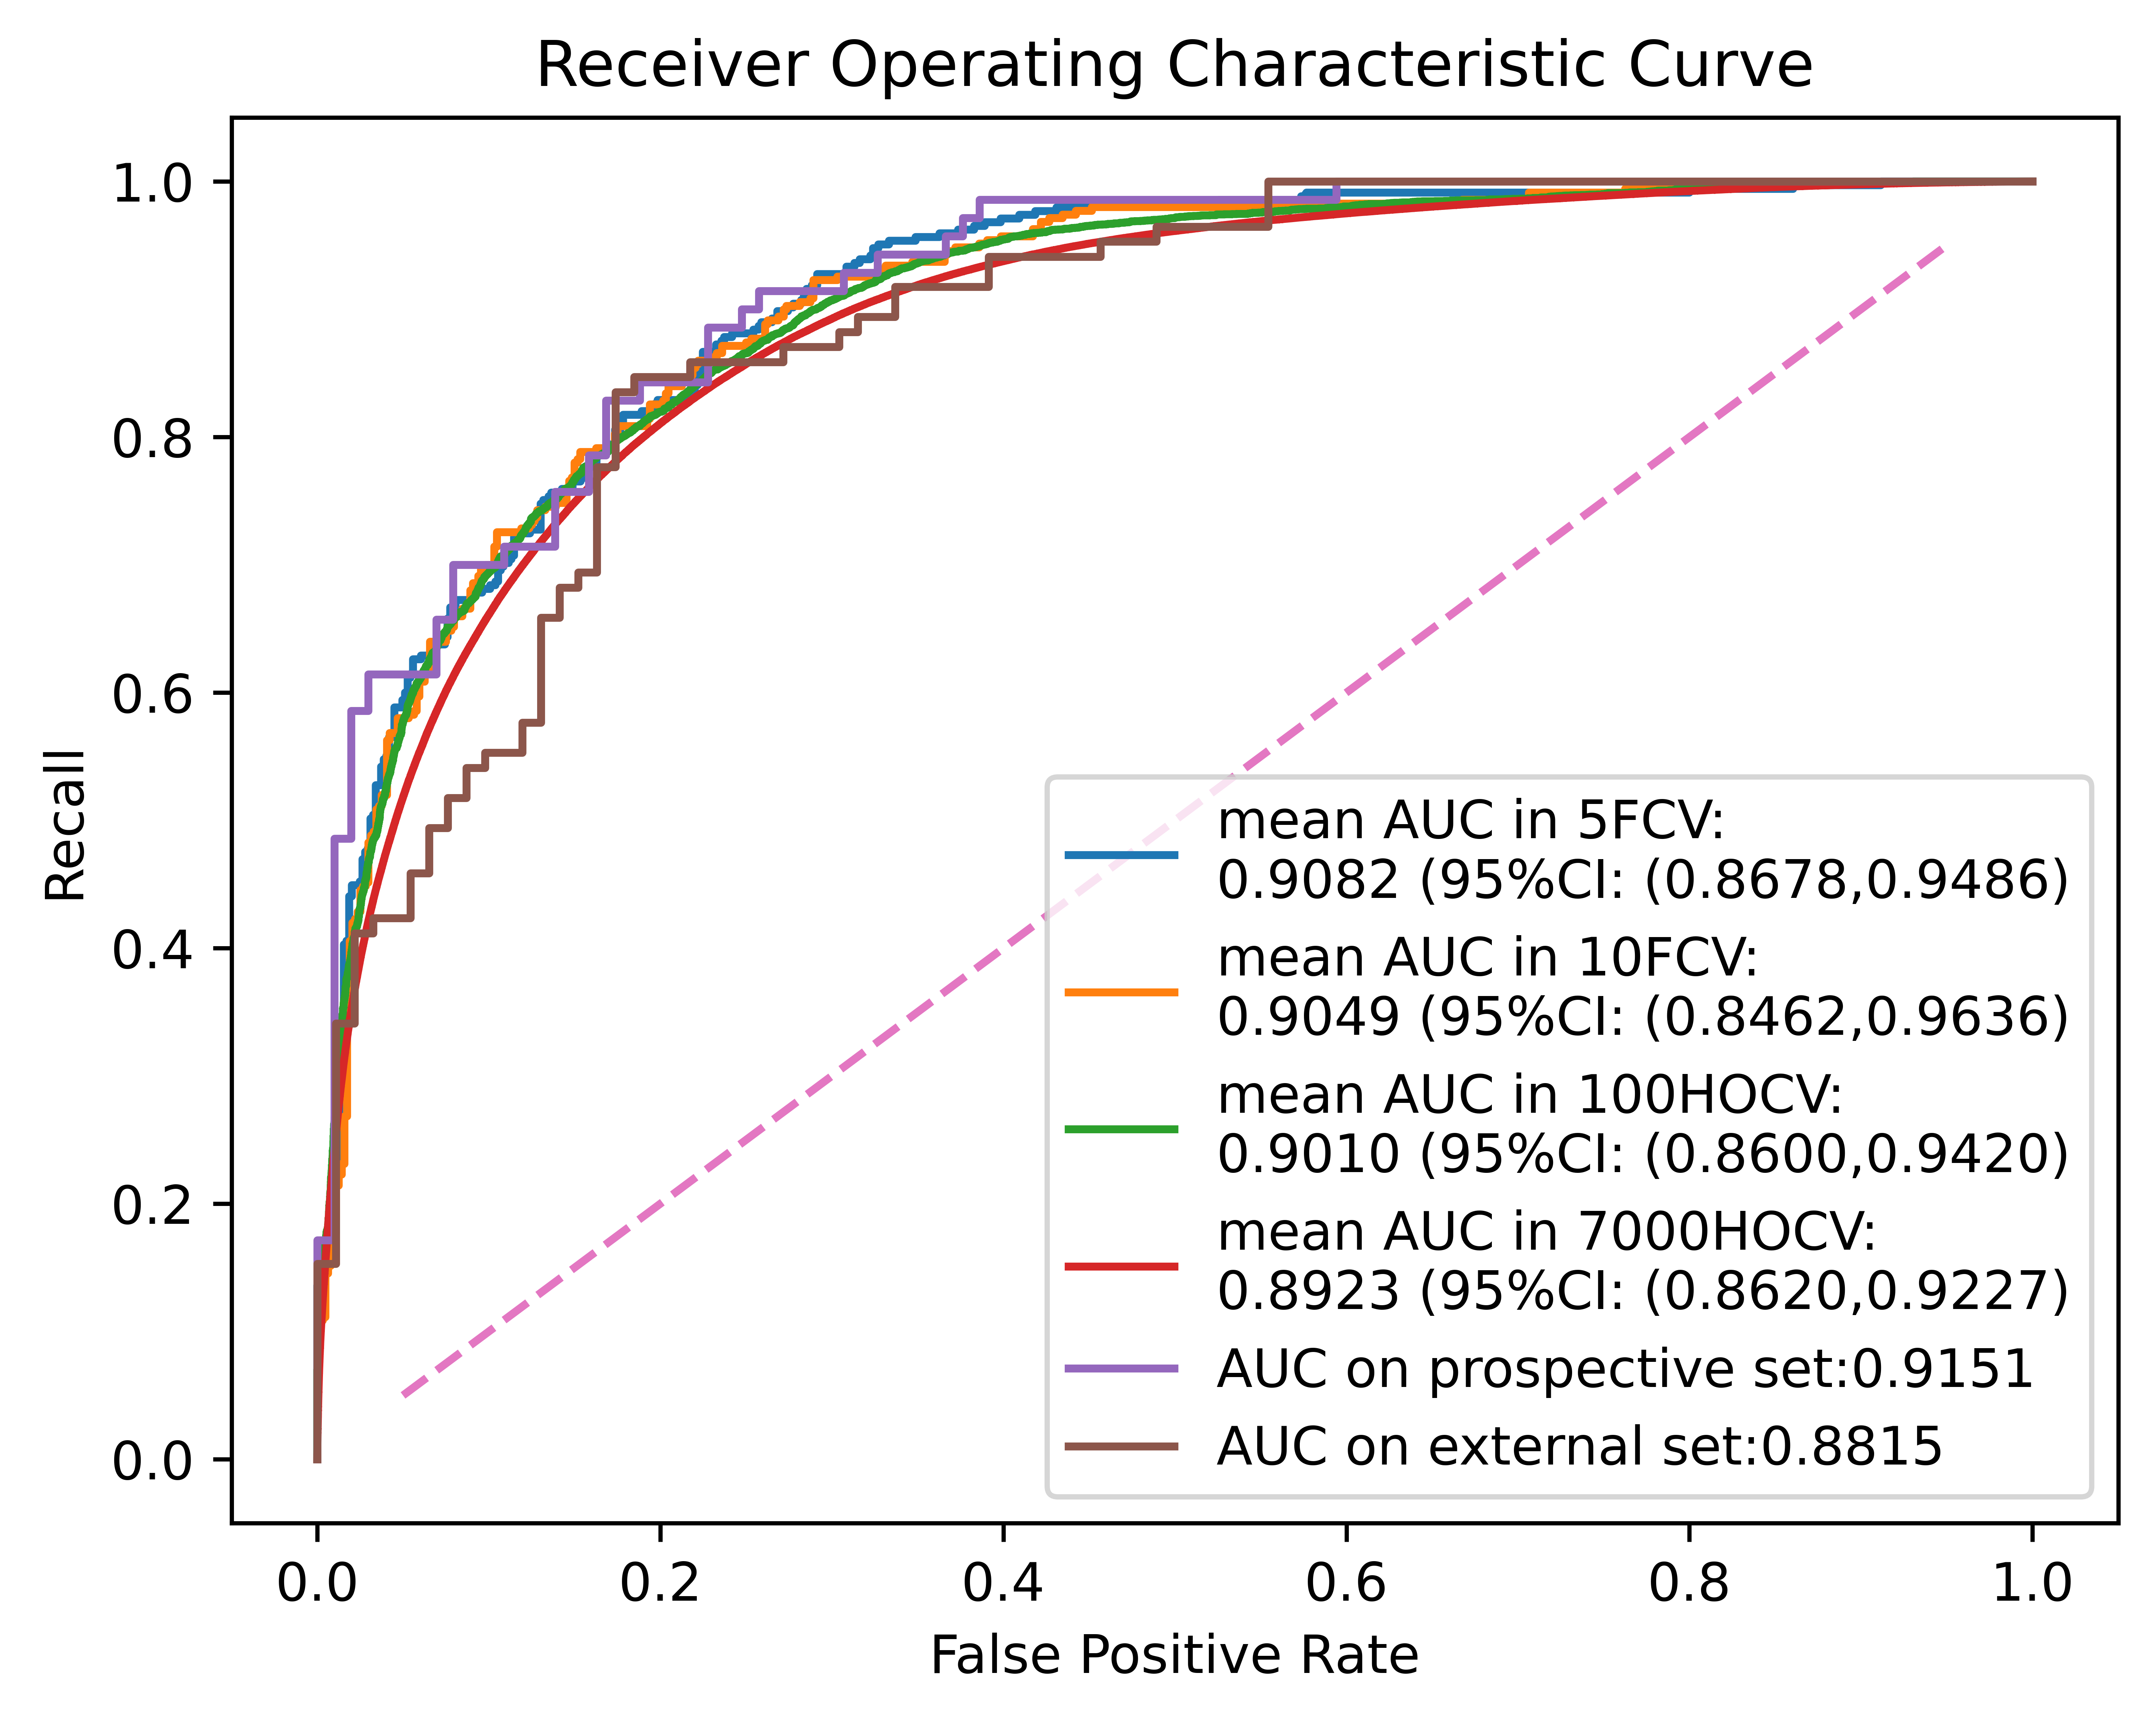

In [19]:
#-----------------------------------plt_all------------------------------
plt.figure(dpi = 1000)   
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver Operating Characteristic Curve')

plt.plot(fpr_5FCV,tpr_5FCV, label = 'mean AUC in 5FCV: \n' + str('%.4f'%auc_5FCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(auc_5FCV_mean - auc_5FCV_std * 1.96)) + ',' +   str('%.4f'%(auc_5FCV_mean + auc_5FCV_std * 1.96)) + ')')

plt.plot(fpr_10FCV,tpr_10FCV, label = 'mean AUC in 10FCV: \n' + str('%.4f'%auc_10FCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(auc_10FCV_mean - auc_10FCV_std * 1.96)) + ',' +   str('%.4f'%(auc_10FCV_mean + auc_10FCV_std * 1.96)) + ')')

plt.plot(fpr_100HOCV,tpr_100HOCV, label = 'mean AUC in 100HOCV: \n' + str('%.4f'%auc_100HOCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(auc_100HOCV_mean - auc_100HOCV_std * 1.96)) + ',' +   str('%.4f'%(auc_100HOCV_mean + auc_100HOCV_std * 1.96)) + ')')

plt.plot(fpr_7000HOCV,tpr_7000HOCV, label = 'mean AUC in 7000HOCV: \n' + str('%.4f'%auc_7000HOCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(auc_7000HOCV_mean - auc_7000HOCV_std * 1.96)) + ',' +   str('%.4f'%(auc_7000HOCV_mean + auc_7000HOCV_std * 1.96)) + ')')

plt.plot(fpr_2,tpr_2, label = 'AUC on prospective set:' + str('%.4f'%auc_2))
plt.plot(fpr_3,tpr_3, label = 'AUC on external set:' + str('%.4f'%auc_3))
plt.plot([0.05,0.95],[0.05,0.95],linestyle='--') #y=x,refference line
plt.legend(loc='lower right')

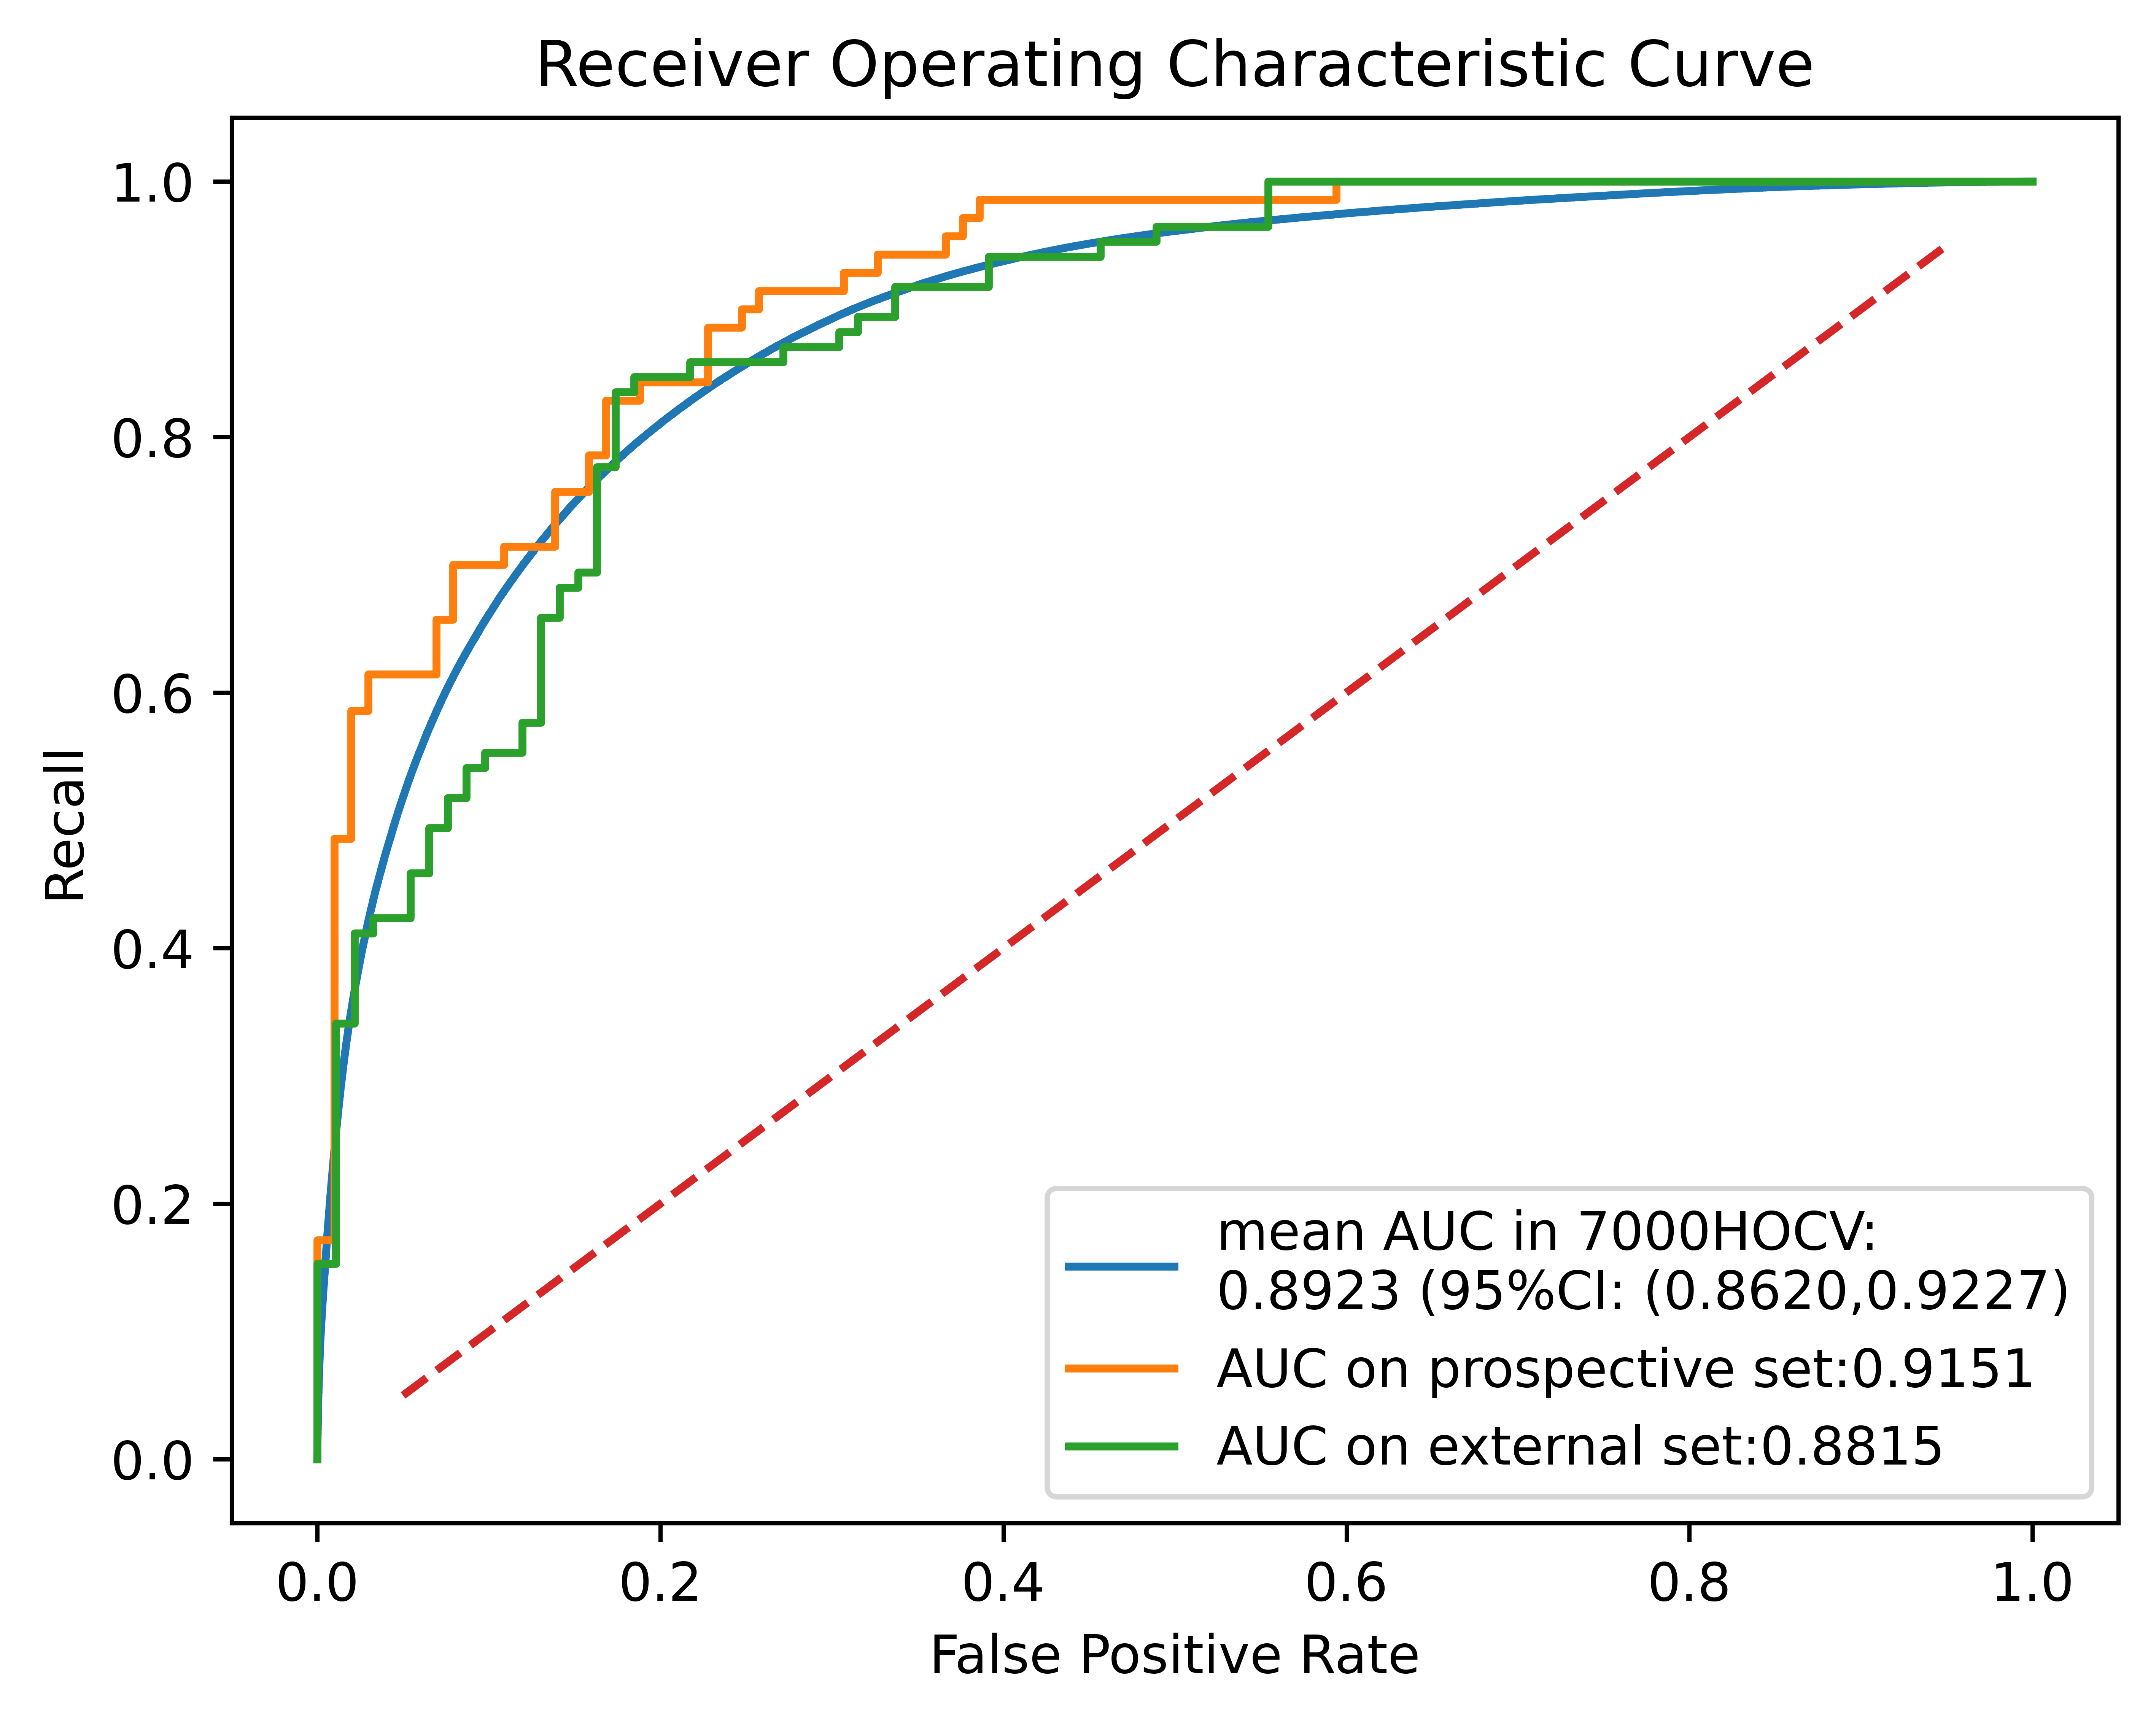

In [20]:
#-----------------------------------plt_sets------------------------------
plt.figure(dpi = 1000)   
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver Operating Characteristic Curve')

plt.plot(fpr_7000HOCV,tpr_7000HOCV, label = 'mean AUC in 7000HOCV: \n' + str('%.4f'%auc_7000HOCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(auc_7000HOCV_mean - auc_7000HOCV_std * 1.96)) + ',' +   str('%.4f'%(auc_7000HOCV_mean + auc_7000HOCV_std * 1.96)) + ')')

plt.plot(fpr_2,tpr_2, label = 'AUC on prospective set:' + str('%.4f'%auc_2))
plt.plot(fpr_3,tpr_3, label = 'AUC on external set:' + str('%.4f'%auc_3))
plt.plot([0.05,0.95],[0.05,0.95],linestyle='--') #y=x,refference line
plt.legend(loc='lower right')

3.2 PRC

In [21]:
pr_5FCV,re_5FCV,thrpr_5FCV = metrics.precision_recall_curve(y_5FCV, prob_5FCV)
pr_10FCV,re_10FCV,thrpr_10FCV = metrics.precision_recall_curve(y_10FCV, prob_10FCV)
pr_100HOCV,re_100HOCV,thrpr_100HOCV = metrics.precision_recall_curve(y_100HOCV, prob_100HOCV)
pr_7000HOCV,re_7000HOCV,thrpr_7000HOCV = metrics.precision_recall_curve(y_7000HOCV, prob_7000HOCV)

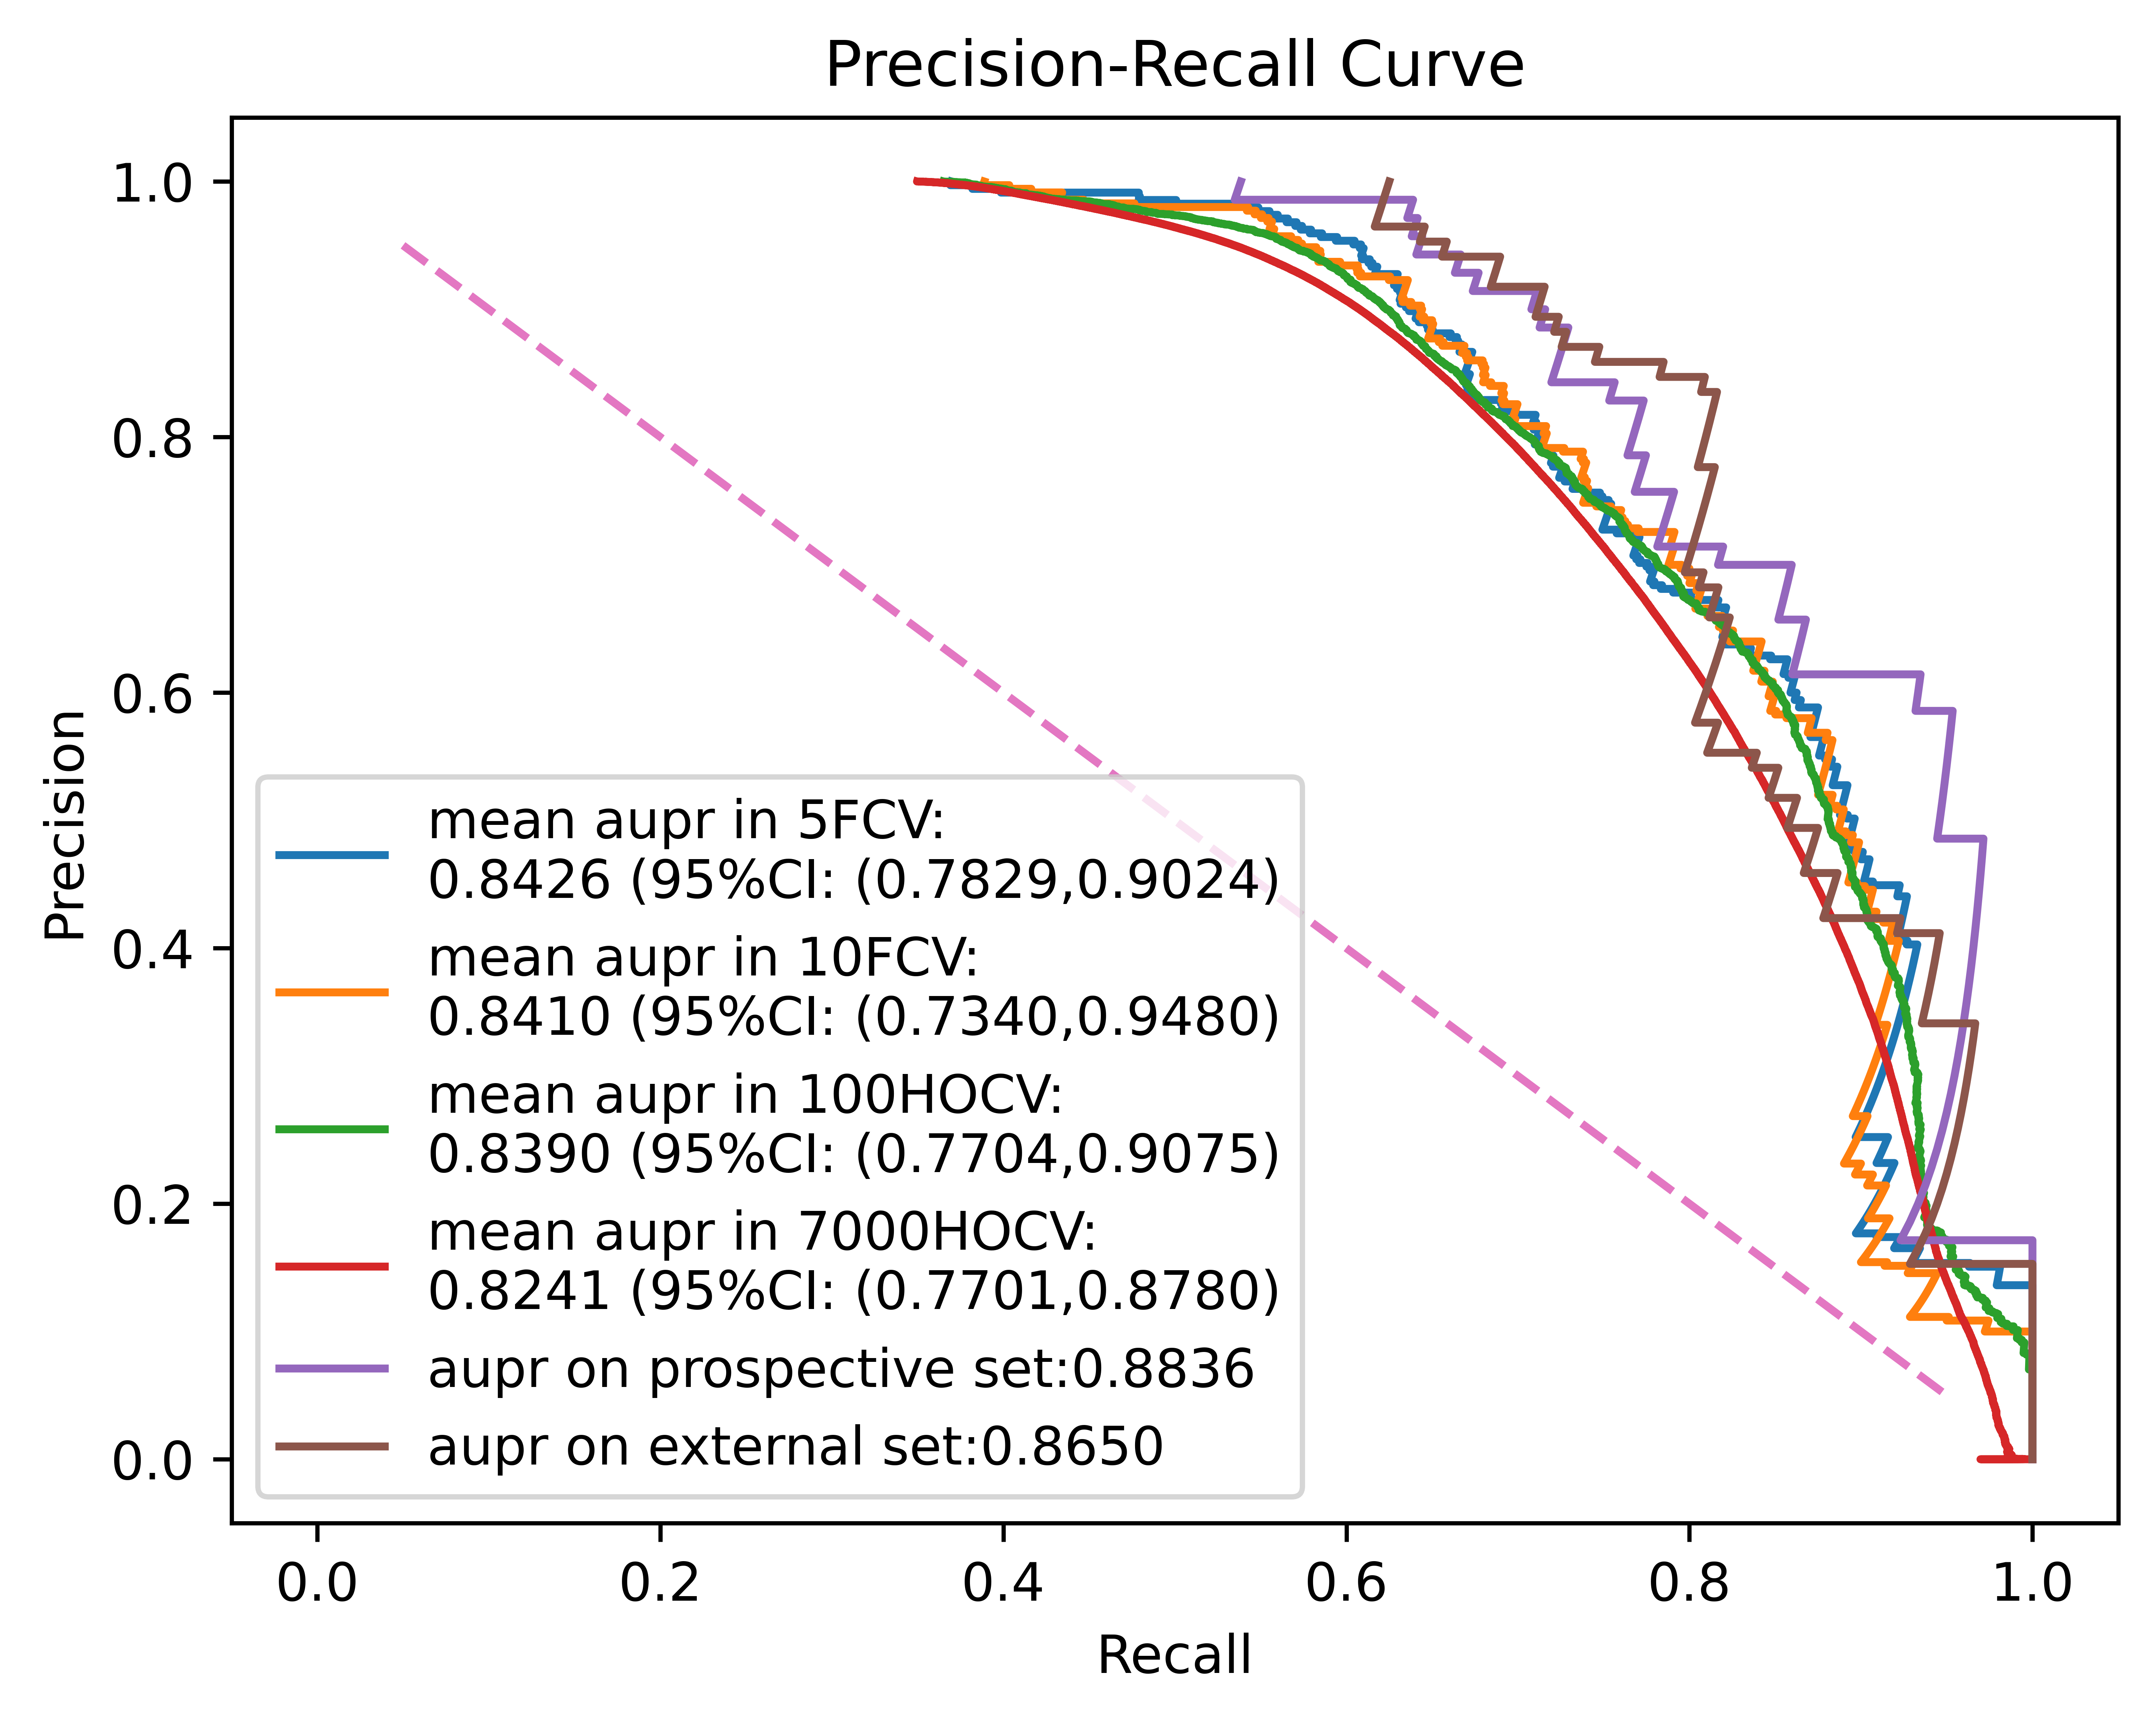

In [22]:
#-----------------------------------plt_all------------------------------
plt.figure(dpi = 1000)   
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.plot(pr_5FCV,re_5FCV, label = 'mean aupr in 5FCV: \n' + str('%.4f'%aupr_5FCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(aupr_5FCV_mean - aupr_5FCV_std * 1.96)) + ',' +   str('%.4f'%(aupr_5FCV_mean + aupr_5FCV_std * 1.96)) + ')')

plt.plot(pr_10FCV,re_10FCV, label = 'mean aupr in 10FCV: \n' + str('%.4f'%aupr_10FCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(aupr_10FCV_mean - aupr_10FCV_std * 1.96)) + ',' +   str('%.4f'%(aupr_10FCV_mean + aupr_10FCV_std * 1.96)) + ')')

plt.plot(pr_100HOCV,re_100HOCV, label = 'mean aupr in 100HOCV: \n' + str('%.4f'%aupr_100HOCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(aupr_100HOCV_mean - aupr_100HOCV_std * 1.96)) + ',' +   str('%.4f'%(aupr_100HOCV_mean + aupr_100HOCV_std * 1.96)) + ')')

plt.plot(pr_7000HOCV,re_7000HOCV, label = 'mean aupr in 7000HOCV: \n' + str('%.4f'%aupr_7000HOCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(aupr_7000HOCV_mean - aupr_7000HOCV_std * 1.96)) + ',' +   str('%.4f'%(aupr_7000HOCV_mean + aupr_7000HOCV_std * 1.96)) + ')')

plt.plot(pr_2,re_2, label = 'aupr on prospective set:' + str('%.4f'%aupr_2))
plt.plot(pr_3,re_3, label = 'aupr on external set:' + str('%.4f'%aupr_3))

# plt.plot(fpr_test,tpr_test, label = 'AUC on test set:' + str('%.4f'%auc_test))
plt.plot([0.05,0.95],[0.95,0.05],linestyle='--') #y=x,refference line
plt.legend(loc='lower left')


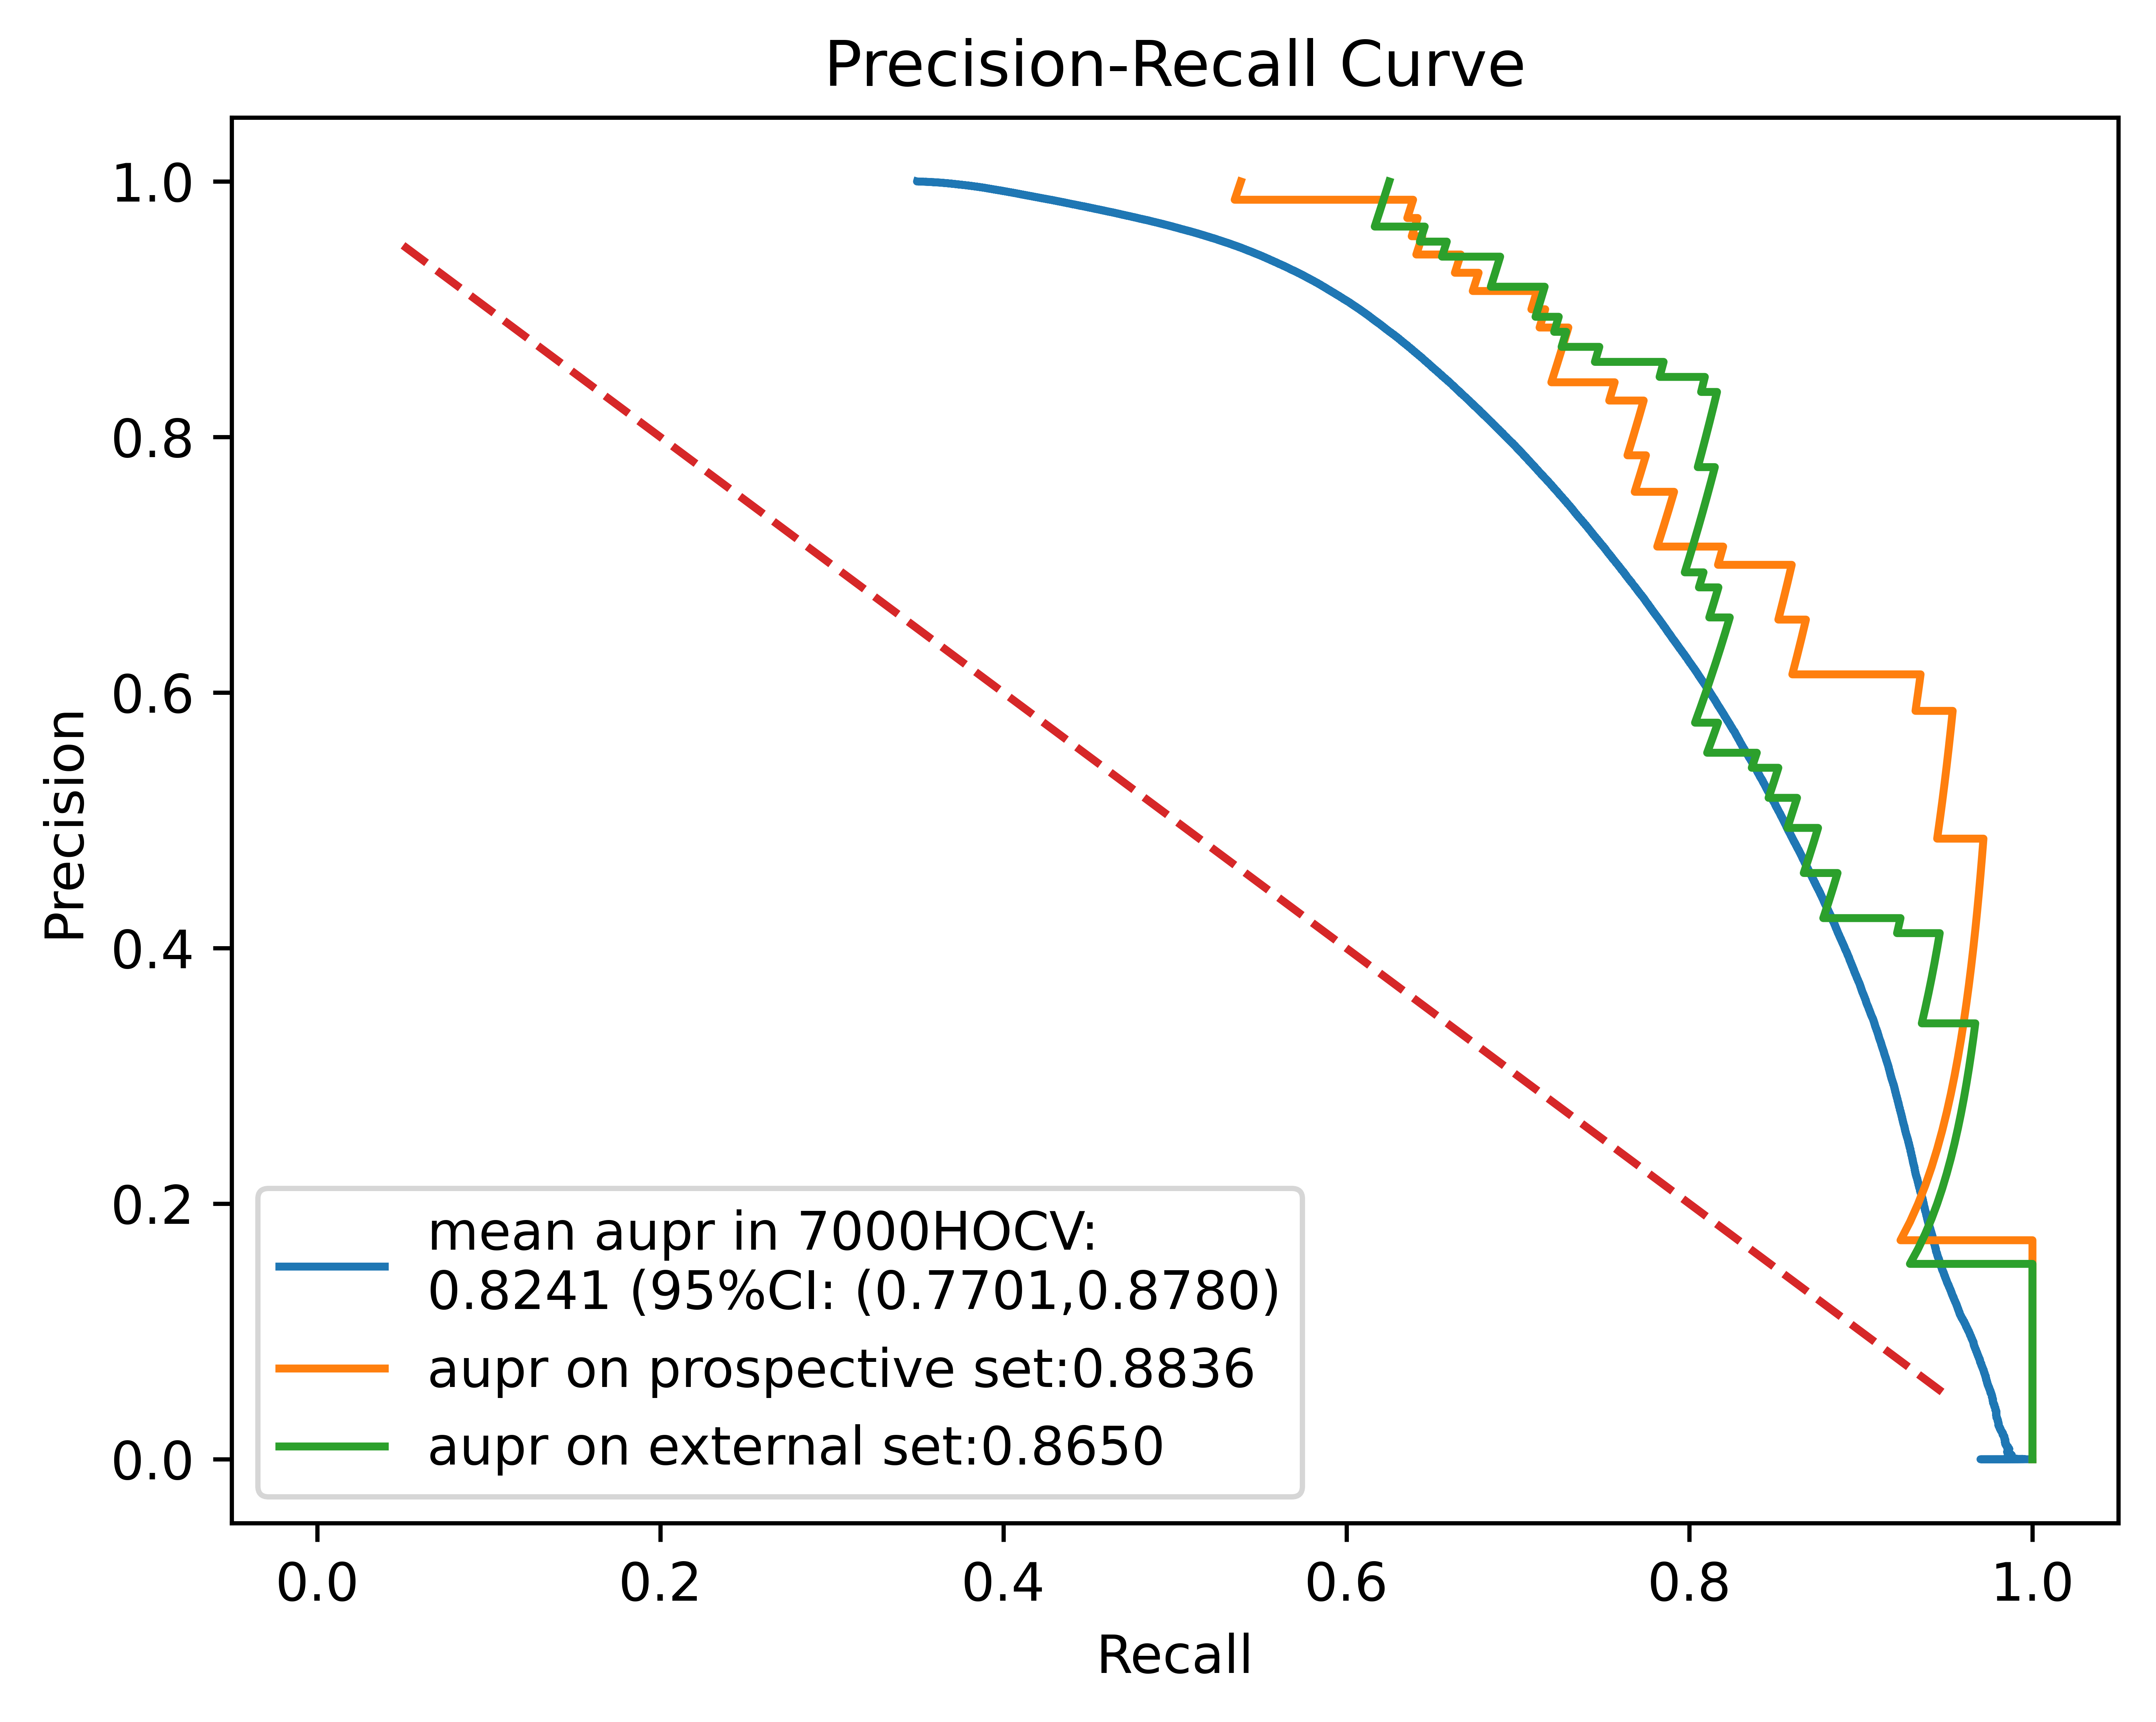

In [23]:
#-----------------------------------plt_sets------------------------------
plt.figure(dpi = 1000)   
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.plot(pr_7000HOCV,re_7000HOCV, label = 'mean aupr in 7000HOCV: \n' + str('%.4f'%aupr_7000HOCV_mean) + 
         ' (95%CI: (' + str('%.4f'%(aupr_7000HOCV_mean - aupr_7000HOCV_std * 1.96)) + ',' +   str('%.4f'%(aupr_7000HOCV_mean + aupr_7000HOCV_std * 1.96)) + ')')

plt.plot(pr_2,re_2, label = 'aupr on prospective set:' + str('%.4f'%aupr_2))
plt.plot(pr_3,re_3, label = 'aupr on external set:' + str('%.4f'%aupr_3))

# plt.plot(fpr_test,tpr_test, label = 'AUC on test set:' + str('%.4f'%auc_test))
plt.plot([0.05,0.95],[0.95,0.05],linestyle='--') #y=x,refference line
plt.legend(loc='lower left')


4. misclassifications

In [24]:
# ---------------------------------prospective set---------------------------
mis_cla_2 = []
for i in range(len(y_2)):
    mis_cla_2.append(y_2[i] != pred_2[i])
data_2[mis_cla_2][sig_feas]

S_NUM_S  AGE  S_E_T  S_BTH_T    S_T  F  I   S_ET_RA  SEX  S_ET   S_ST
3          1   56   6.00     0.00   6.00  0  1  0.166667    1  1.00   6.00
4          3   28   6.00     4.00   6.00  0  1  0.666667    1  4.00   6.00
6          3   55   0.00     0.40  48.00  0  0  0.000000    2  0.00   0.40
8          1   48   0.23     0.00   0.23  0  1  0.000000    1  0.00   0.23
16         1   36   0.00     0.00   0.50  0  0  0.000000    1  0.00   0.00
19         2   64   0.00     0.00   2.00  1  1  1.000000    2  2.00   2.00
20         2   30   0.00     1.00   1.00  1  0  1.000000    2  1.00   1.00
21         1   51   0.00     0.00   1.00  0  0  0.000000    2  0.00   0.00
24         3   29   0.00     0.50   1.00  0  1  0.500000    1  0.50   0.50
25         1   39   0.00     0.00   1.00  0  0  0.000000    2  0.00   1.00
31         2   61   0.00     1.00  36.00  0  1  0.000000    1  0.00   1.00
47         1   46   0.50     0.00   0.50  0  1  0.000000    1  0.00   0.50
49         1   73   0.00     0.00   3.00  1  1  0.000000    1  0.00   3.00
64         1   53   0.00     0.00   0.27  0  0  0.000000    1  0.00   0.27
66         2   44   0.50     1.50   1.50  0  0  0.000000    1  0.00   1.50
68         2   51   0.00     0.00   3.00  1  0  0.000000    1  0.00   0.25
93         1   58   1.00     0.00   1.00  1  0  0.000000    1  0.00   1.00
102        1   57   0.00     0.00   2.00  0  0  0.000000    2  0.00   2.00
105        1   53   0.00     0.00  12.00  0  0  0.166667    1  2.00  12.00
107        2   45   0.00     1.50   1.50  1  0  0.333333    2  0.50   1.50
110        1   35   0.00     0.67   0.67  1  0  0.343284    2  0.23   0.67
112        1   47   0.00     0.00   1.00  0  0  0.000000    1  0.00   1.00
117        4   50   0.00     0.50  12.00  1  1  0.041667    2  0.50   6.00
131        3   43   0.83     0.00   0.83  0  0  0.843373    1  0.70   0.83
133        1   53   6.00     0.00   6.00  0  0  1.000000    1  6.00   6.00
135        1   42   0.00     1.00   1.00  0  0  0.000000    2  0.00   1.00
146        1   42   0.00     0.00   1.50  1  0  1.000000    1  1.50   1.50
149        1   33   1.00     0.00   1.00  1  0  0.000000    2  0.00   1.00
159        1   51   0.00     0.00   0.70  0  0  0.000000    2  0.00   0.70
164        2   61   0.00     0.00   1.50  1  0  0.666667    1  1.00   1.50
169        3   49   0.00     0.00   4.00  1  0  0.500000    1  2.00   4.00

In [25]:
# ---------------------------------external set---------------------------
mis_cla_3 = []
for i in range(len(y_3)):
    mis_cla_3.append(y_3[i] != pred_3[i])
data_3[mis_cla_3][sig_feas]

S_NUM_S  AGE  S_E_T  S_BTH_T     S_T  F  I   S_ET_RA  SEX   S_ET   S_ST
4          3   59   0.00     0.01   0.010  1  0  1.000000    1  0.010  0.010
7          1   64   0.00     0.00   0.500  1  0  0.000000    1  0.000  0.500
8          1   59   0.00     0.00   1.000  1  0  0.370000    2  0.370  1.000
22         1   54   0.00     0.00   2.000  0  0  0.115000    1  0.230  2.000
25         3   68   0.00     0.00   0.330  1  1  0.303030    2  0.100  0.100
27         1   70   0.00     0.00   0.330  1  1  0.303030    1  0.100  0.330
29         1   59   0.33     0.00   0.330  0  0  0.000000    1  0.000  0.330
30         1   47   0.00     1.00   1.000  1  0  0.000000    2  0.000  1.000
31         2   49   0.00     0.00   1.000  1  0  0.230000    2  0.230  1.000
34         2   52   0.00     0.50   0.500  1  0  0.260000    2  0.130  0.500
40         1   56   0.00     0.00   0.230  0  0  0.000000    1  0.000  0.230
50         2   23   0.00     0.00   1.000  1  0  0.230000    1  0.230  1.000
51         2   38   0.00     0.00   0.230  1  0  0.000000    1  0.000  0.230
54         2   49   0.00     1.00   1.000  1  0  0.230000    1  0.230  1.000
56         3   56   0.00     0.07  18.000  1  0  0.000000    2  0.000  0.070
57         1   56   0.00     0.23   0.230  1  1  1.000000    1  0.230  0.230
59         2   21   0.00     0.00   0.007  1  0  1.000000    1  0.007  0.007
61         2   63   0.10     0.00   0.270  0  0  0.851852    2  0.230  0.270
72         1   51   0.00     0.00   1.000  1  0  0.000000    2  0.000  1.000
77         1   74   0.00     0.00   0.900  1  1  0.000000    1  0.000  0.900
94         1   35   0.00     1.00   1.000  1  0  0.400000    2  0.400  1.000
95         1   23   0.00     0.93   0.930  1  0  0.290323    2  0.270  0.930
115        1   52   0.00     0.27   0.270  0  0  0.000000    2  0.000  0.270
116        3   40   0.00     0.00   0.300  1  0  0.000000    2  0.000  0.300
125        1   68   0.33     0.00   0.330  0  0  0.000000    1  0.000  0.330
135        1   53   0.10     0.00   0.100  1  0  0.000000    2  0.000  0.100
140        1   51   0.00     0.00   0.670  0  0  0.791045    2  0.530  0.670
142        1   76   0.00     0.00   0.500  1  0  0.000000    1  0.000  0.000
147        1   75   0.00     0.00   1.000  1  0  0.670000    2  0.670  1.000
149        1   56   0.00     1.00   1.000  1  0  0.000000    2  0.000  1.000
150        3   34   0.33     3.00   3.000  1  0  0.110000    2  0.330  3.000
153        2   64   0.00     0.00   0.500  1  1  0.000000    1  0.000  0.500
165        1   66   0.00     0.00   1.000  0  0  0.230000    2  0.230  1.000
170        2   55   0.00     0.00   1.670  1  0  0.000000    2  0.000  1.670
176        2   24   0.00     0.33   0.330  1  1  0.454545    1  0.150  0.330